# OC Parcours Datascience

# Projet 4: Anticipez les besoins en consommation électrique de bâtiments

## Etudiant: Vincent GAGNOT

#### 1. Import des données  
#### 2. Analyse exploratoire préliminaire  
#### 3. Feature engineering  
#### 4. Préparation des données avant application des modèles  
#### 5. Test des modèles de machine learning  
#### 6. Modèle sélectionné: affinage des paramètres et Feature importance  
  
#### Annexe: Feature importance pour des modèles sans coefficients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

## 1. Import des données

In [2]:
data0 = pd.read_csv("2016-building-energy-benchmarking.csv", delimiter=',')

In [3]:
data0.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [4]:
data0.shape

(3376, 46)

## 2. Analyse exploratoire préliminaire. 

Pour l'ensemble des données, double graph: remplissage (pie chart), répartition (histogramme).  
Pour les données inadaptées à ce genre de représentation (données non numériques, prenant plus de 30 valeurs différentes), je fais apparaître les premières valeurs de la liste.

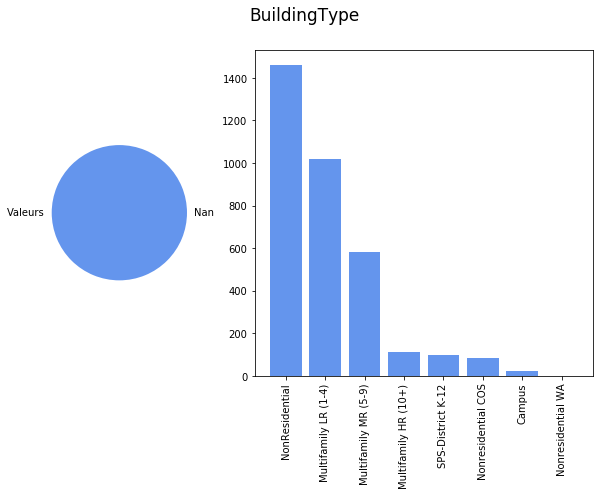

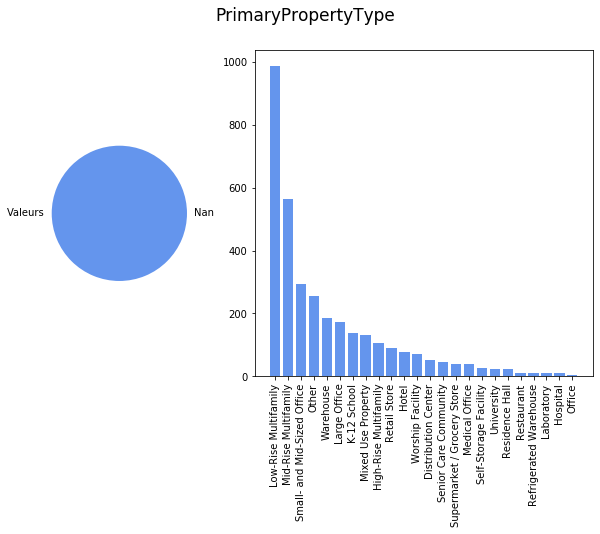

Not shown: PropertyName
Not shown: Address


C:\Users\vince\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vince\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


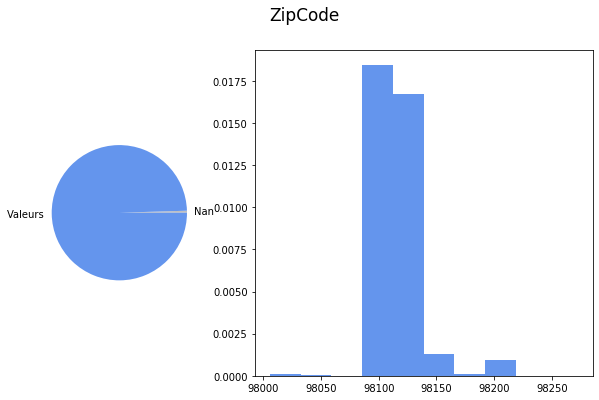

Not shown: TaxParcelIdentificationNumber


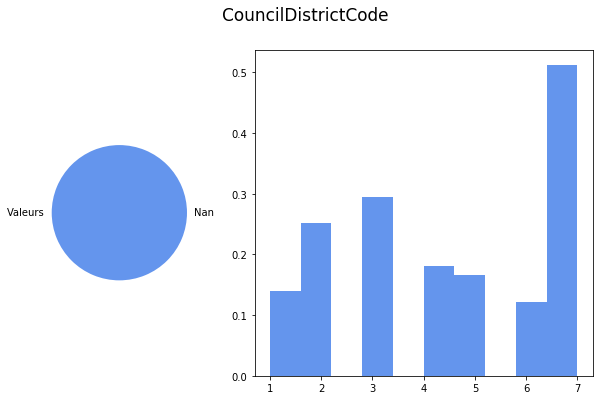

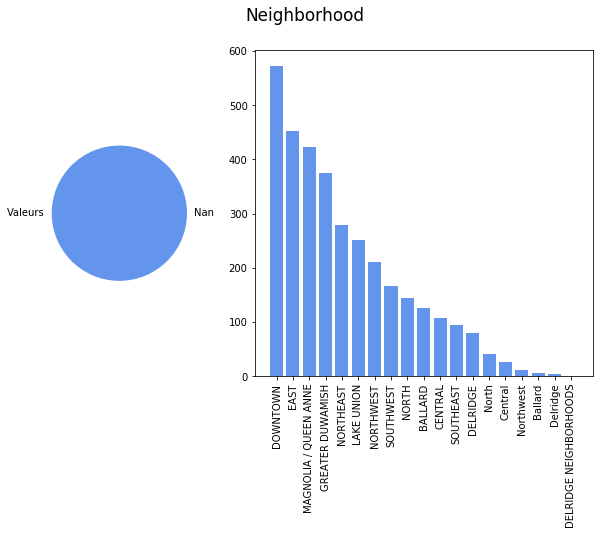

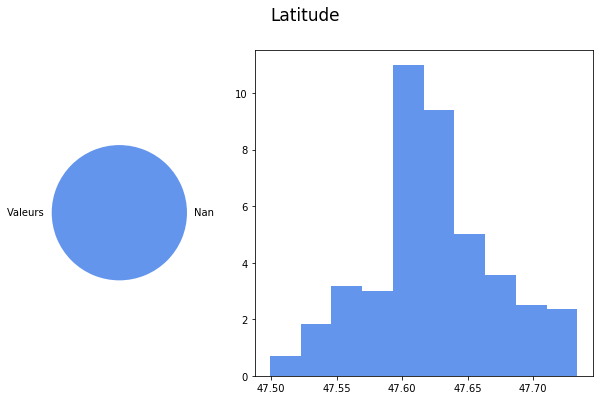

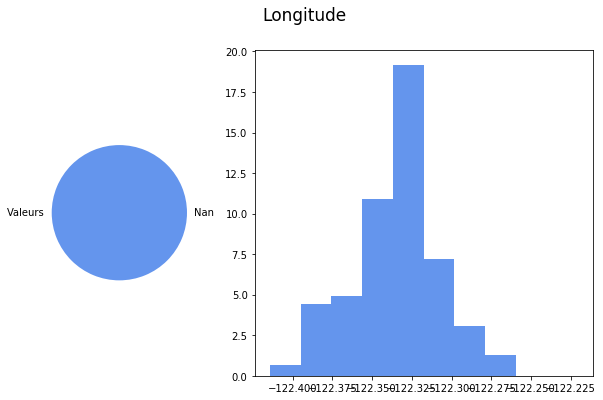

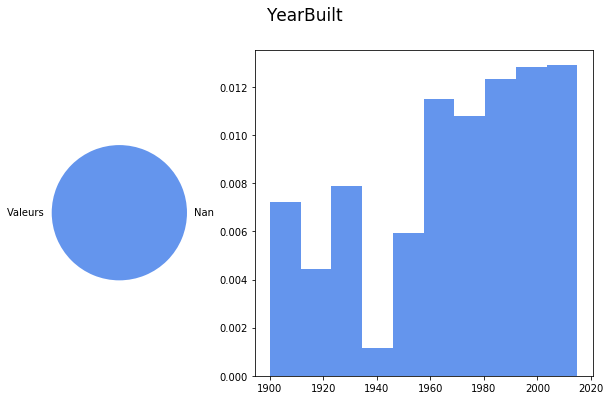

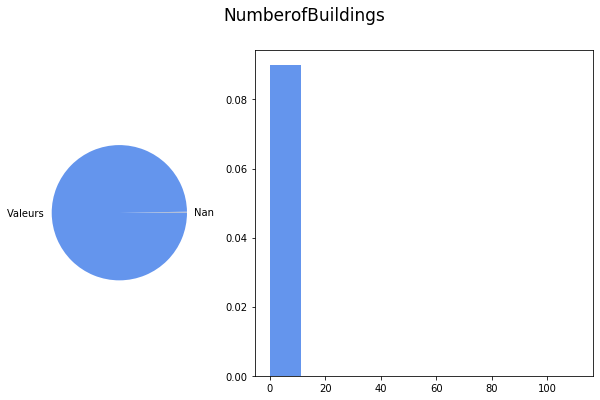

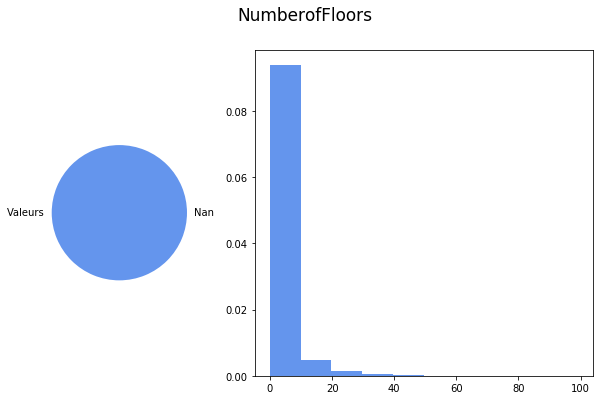

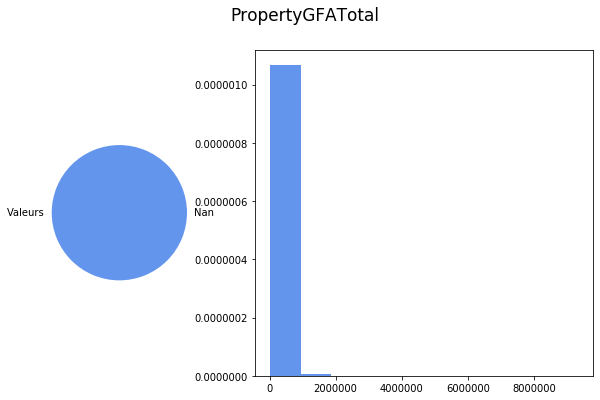

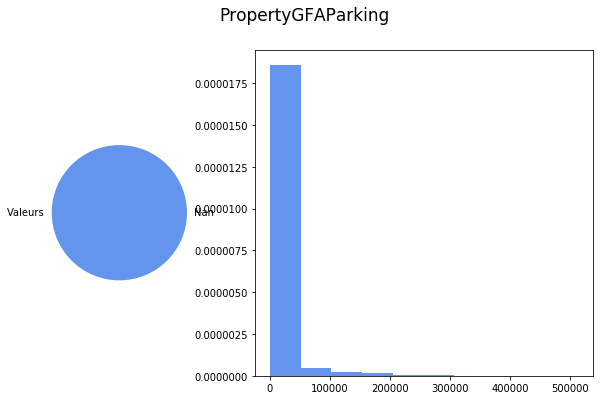

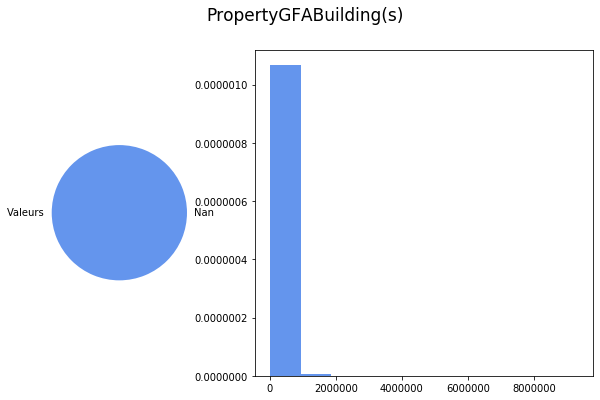

Not shown: ListOfAllPropertyUseTypes
Not shown: LargestPropertyUseType


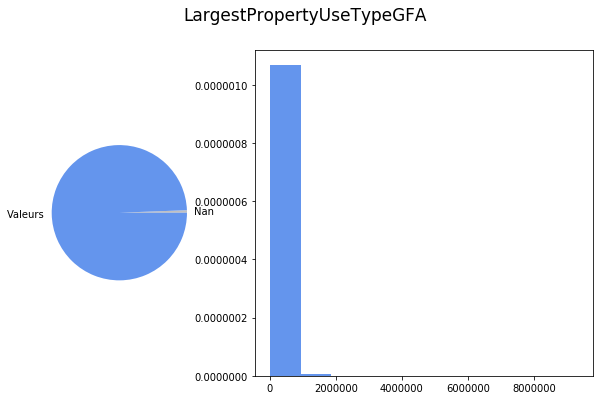

Not shown: SecondLargestPropertyUseType


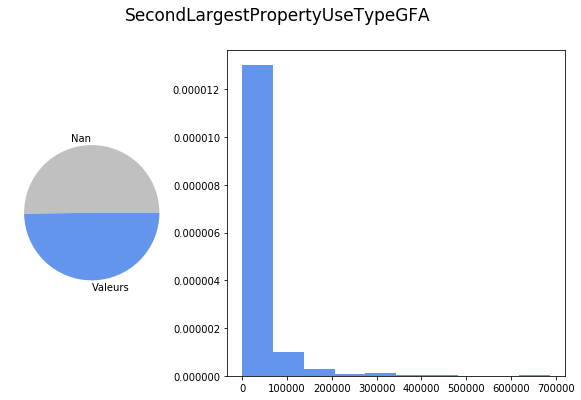

Not shown: ThirdLargestPropertyUseType


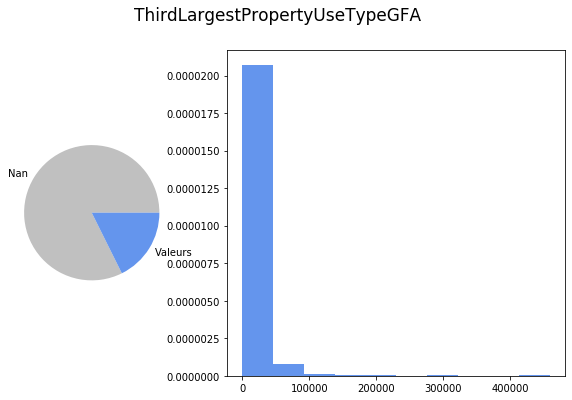

Not shown: YearsENERGYSTARCertified


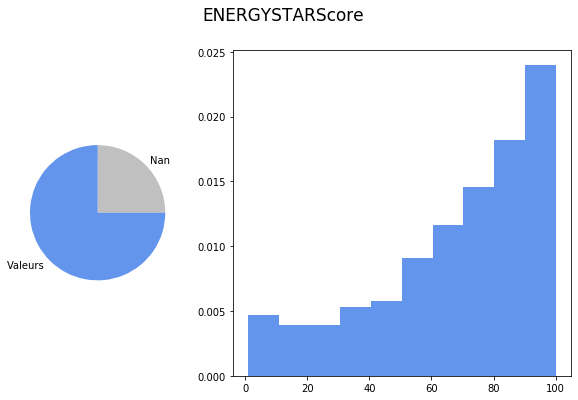

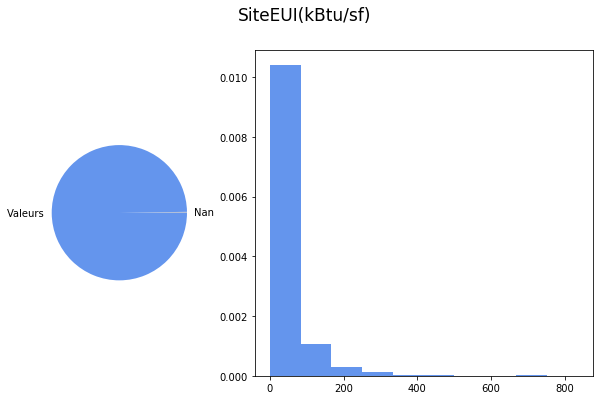

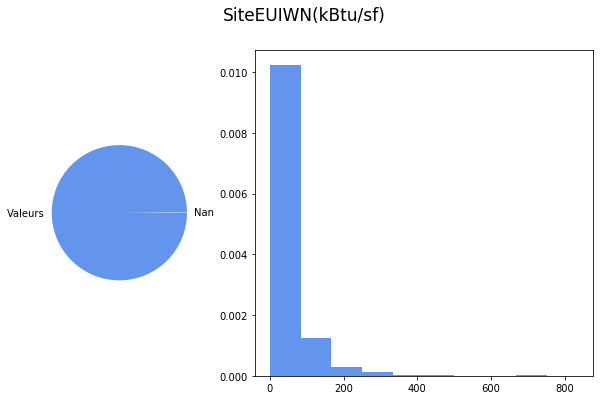

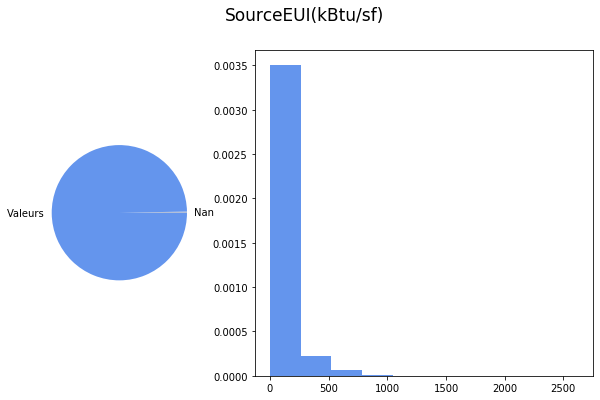

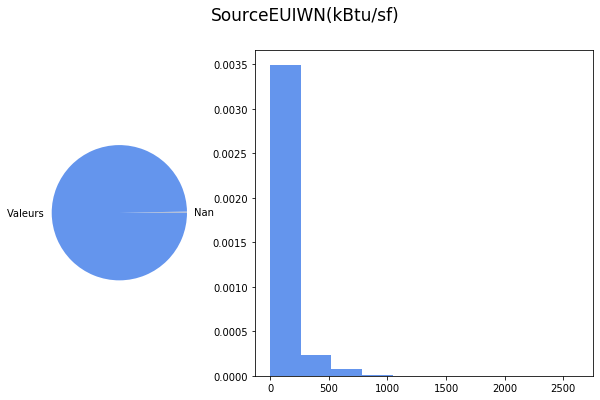

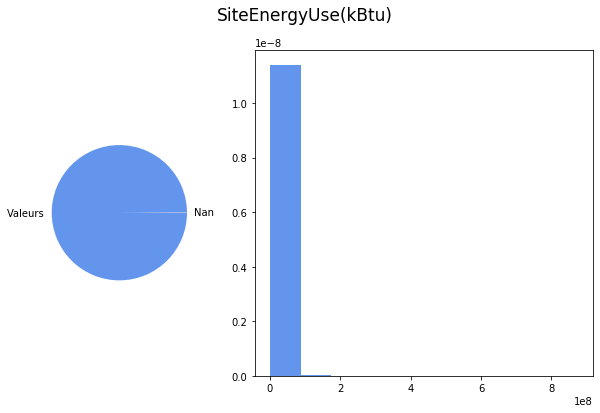

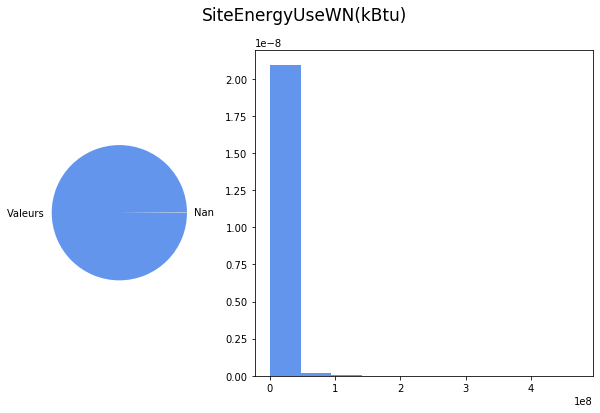

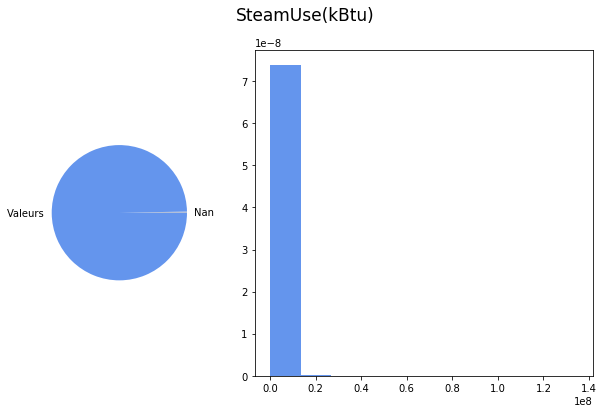

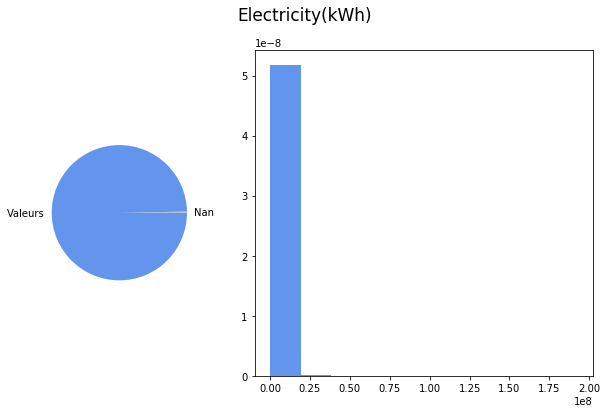

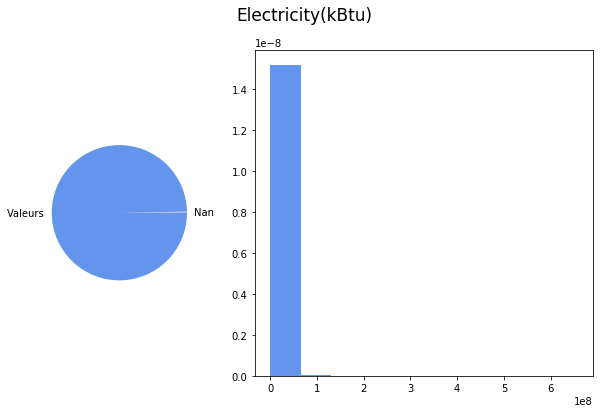

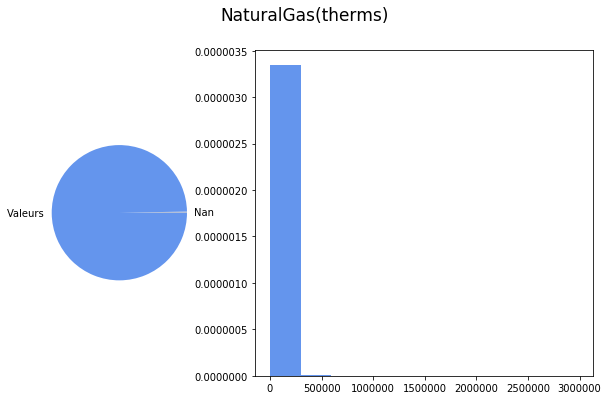

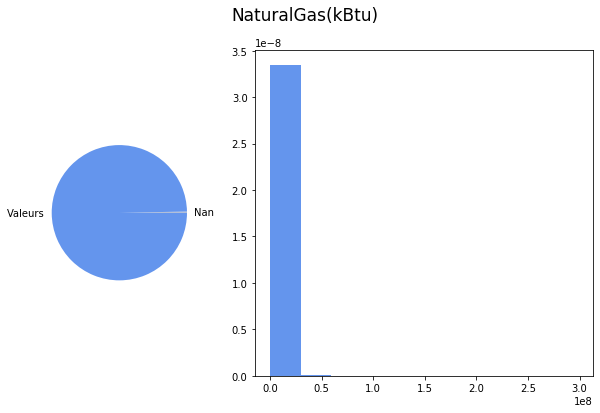

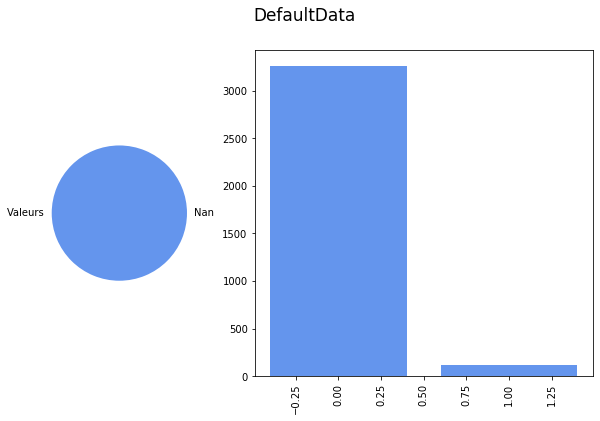

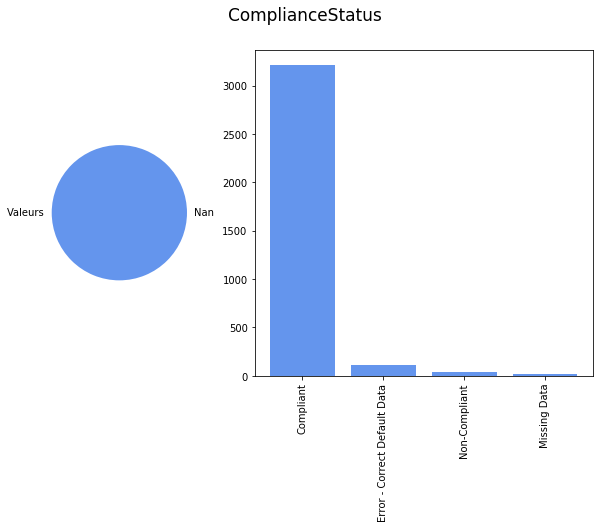

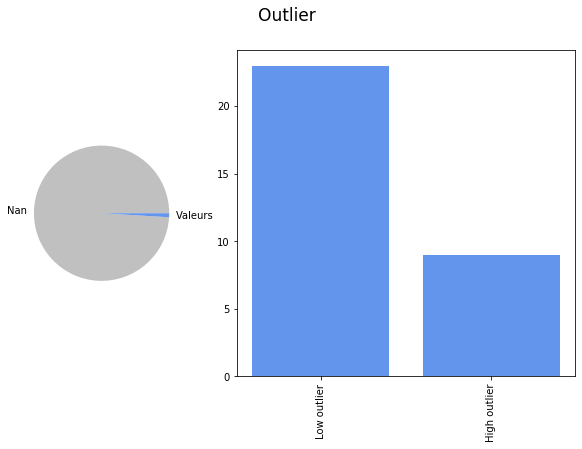

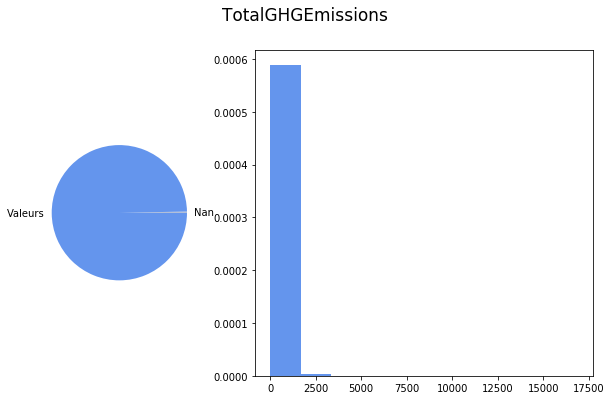

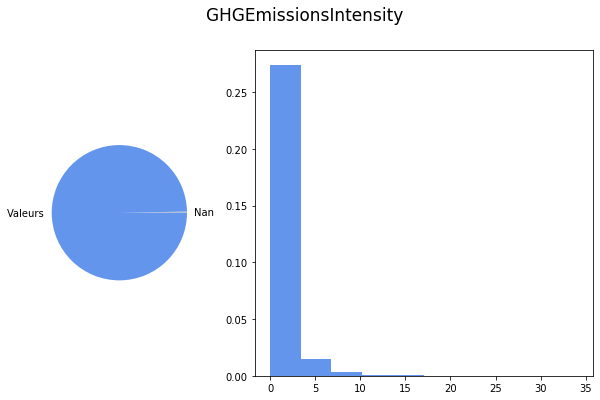

 
PropertyName:
['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle'
 'HOTEL MAX' 'WARWICK SEATTLE HOTEL (ID8)' 'West Precinct' 'Camlin'
 'Paramount Theatre' '311wh-Pioneer Square' 'Lyon Building'
 'Hotel Monaco Seattle' '5679-W Seattle' 'Executive Pacific Plaza'
 'Crowne Plaza Hotel Seattle' 'Hotel Vintage Seattle'
 'The Seattle Public Library - Central Library' 'Downtown Seattle YMCA'
 'Renaissance Seattle Hotel' 'The Rainier Club' 'Arctic Club Seattle'
 'King County Courthouse' 'King County Correctional Facility'
 'Graham Hill Elementary' 'WATERTOWN HOTEL' 'Main Campus Center'
 'Seattle Honda' 'Homewood Suites' 'Marriott Springhill Suites (33)'
 'Meany Building'] et 3332 autres.
 
Address:
['405 Olive way' '724 Pine street' '1900 5th Avenue' '620 STEWART ST'
 '401 LENORA ST' '810 Virginia St' '1619 9th Avenue' '911 Pine St'
 '612 2nd Ave' '607 - 3rd Ave.' '1101 4th Avenue' '1112 Fourth Avenue'
 '400 Spring Street' '1113 6th Ave' '1100 5th Avenue' '1000 Fourth Avenue'


In [5]:
Not_shown = []
for i in ['BuildingType',
         'PrimaryPropertyType',
         'PropertyName',
         'Address',
         'ZipCode',
         'TaxParcelIdentificationNumber',
         'CouncilDistrictCode',
         'Neighborhood',
         'Latitude',
         'Longitude',
         'YearBuilt',
         'NumberofBuildings',
         'NumberofFloors',
         'PropertyGFATotal',
         'PropertyGFAParking',
         'PropertyGFABuilding(s)',
         'ListOfAllPropertyUseTypes',
         'LargestPropertyUseType',
         'LargestPropertyUseTypeGFA',
         'SecondLargestPropertyUseType',
         'SecondLargestPropertyUseTypeGFA',
         'ThirdLargestPropertyUseType',
         'ThirdLargestPropertyUseTypeGFA',
         'YearsENERGYSTARCertified',
         'ENERGYSTARScore',
         'SiteEUI(kBtu/sf)',
         'SiteEUIWN(kBtu/sf)',
         'SourceEUI(kBtu/sf)',
         'SourceEUIWN(kBtu/sf)',
         'SiteEnergyUse(kBtu)',
         'SiteEnergyUseWN(kBtu)',
         'SteamUse(kBtu)',
         'Electricity(kWh)',
         'Electricity(kBtu)',
         'NaturalGas(therms)',
         'NaturalGas(kBtu)',
         'DefaultData',
         'ComplianceStatus',
         'Outlier',
         'TotalGHGEmissions',
         'GHGEmissionsIntensity']:
    if all(isinstance(e, (int, float, np.int64, np.int32)) for e in data0[i].unique()):
        val_na = data0[i].isna().sum()/len(data0[i])
        val_non_na = 1 - val_na
        fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]},figsize=(10,6))
        fig.suptitle(i, fontsize=17)
        ax1.pie([val_na, val_non_na], labels = ['Nan', 'Valeurs'], colors=['silver', 'cornflowerblue'])
        ax2.hist(data0[i], density=True, color=['cornflowerblue'])
        plt.show()        
    else:
        if len(data0[i].unique()) < 30:
            nombre_vals = data0[i].value_counts()
            val_na = data0[i].isna().sum()/len(data0[i])
            val_non_na = 1 - val_na
            fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]},figsize=(10,6))
            fig.suptitle(i, fontsize=17)
            ax1.pie([val_na, val_non_na], labels = ['Nan', 'Valeurs'], colors=['silver', 'cornflowerblue'])
            ax2.bar(nombre_vals.index, nombre_vals.values, color=['cornflowerblue'])
            plt.xticks(rotation=90)  
            plt.show()
        else:
            print('Not shown: '+str(i))
            Not_shown.append(i)
for i in Not_shown:
    print(' ')
    print(str(i)+':')
    print(str(data0[i].unique()[0:29])+' et '+str(len(data0[i].unique())-30)+' autres.')

Pour quelques variables, nouveaux graphs, plus parlant (ordonnées en échelle logarithmique).

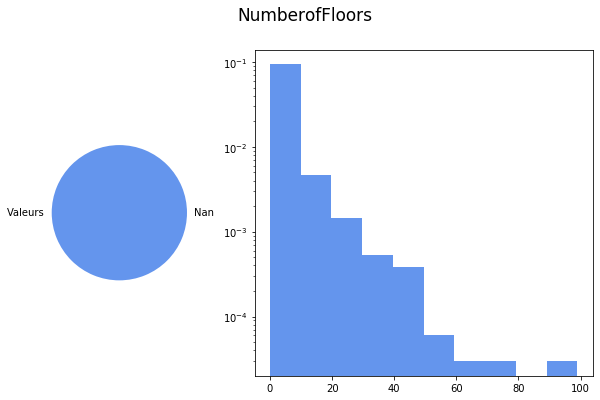

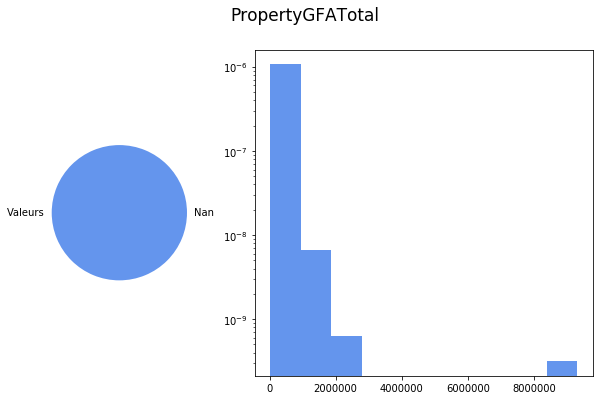

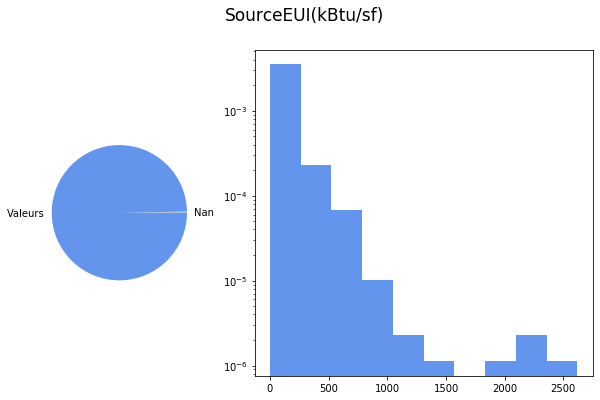

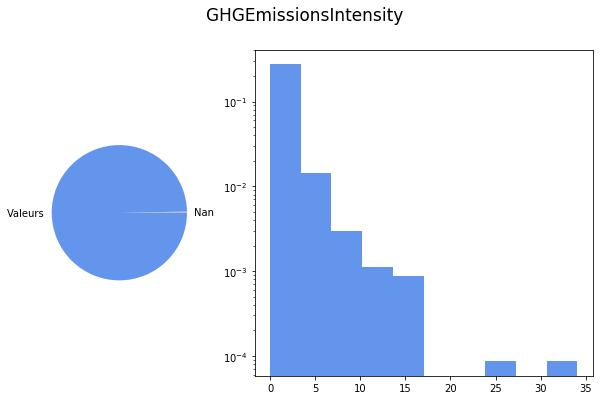

In [6]:
for i in ['NumberofFloors',
         'PropertyGFATotal',
         'SourceEUI(kBtu/sf)',
         'GHGEmissionsIntensity']:
    val_na = data0[i].isna().sum()/len(data0[i])
    val_non_na = 1 - val_na
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]},figsize=(10,6))
    fig.suptitle(i, fontsize=17)
    ax1.pie([val_na, val_non_na], labels = ['Nan', 'Valeurs'], colors=['silver', 'cornflowerblue'])
    ax2.hist(data0[i], density=True, color=['cornflowerblue'])
    plt.yscale("log")
    plt.show()        


## 3. Feature Engineering

Je retraite quelques variables, pour avoir des résultats plus significatifs.

a. Main property uses: simplification  
b. Skewness et échelle logarithmiques  
c. Year Built  
d. Energy star score  
e. Property type uses  
f. Energy source (%)  
g. Ajout d'une sortie possible: conso électrique par unité de surface  
h. BuildType_feature_labels: ajout d'une série d'étiquettes booléennes  
i. Nbh_feature_labels: ajout d'une série d'étiquettes booléennes sur le quartier

#### a. Main property uses: simplification  
Je réduis le nombre d'étiquettes différentes, par regroupement.

In [7]:
data1 = data0.copy()

In [8]:
Dict = {'Library': 'Other - Education', 'Other - Mall': 'Strip Mall', 'Financial Office': 'Office', 
'Urgent Care/Clinic/Other Outpatient': 'Hospital (General Medical & Surgical)',
'Other/Specialty Hospital': 'Hospital (General Medical & Surgical)', 'Performing Arts': 'Other: culture',
'Other - Utility': 'Other','Lifestyle Center': 'Other','Adult Education': 'Other - Education',
'Wholesale Club/Supercenter': 'Other','Police Station': 'Other - Public Services','Fire Station': 'Other - Public Services',
'Movie Theater': 'Other: culture','Courthouse': 'Other - Public Services',
'Convention Center': 'Other - Entertainment/Public Assembly','Residential Care Facility': 'Senior Care Community',
'Food Sales': 'Retail Store','Bar/Nightclub': 'Other - Restaurant/Bar','Enclosed Mall': 'Strip Mall',
'Convenience Store without Gas Station': 'Other','Vocational School': 'Other - Education','Fast Food Restaurant': 'Restaurant',
'Other - Recreation': 'Other','Other - Technology/Science': 'Other','Vocational School': 'Other - Education',
'Other - Public Services': 'Other - Public Services','Other - Utility': 'Other'}

In [9]:
data1 = data1.replace({'LargestPropertyUseType': Dict})
data1 = data1.replace({'SecondLargestPropertyUseType': Dict})
data1 = data1.replace({'ThirdLargestPropertyUseType': Dict})

In [10]:
indexNames = data1[data1['BuildingType'] == 'Multifamily MR (5-9)'].index
data1.drop(indexNames , inplace=True)

indexNames = data1[data1['BuildingType'] == 'Multifamily LR (1-4)'].index
data1.drop(indexNames , inplace=True)

indexNames = data1[data1['BuildingType'] == 'Multifamily HR (10+)'].index
data1.drop(indexNames , inplace=True)

print(data1['BuildingType'].unique())

['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']


In [11]:
def check_nan_puse(row):
    y = False
    if ((type(row['LargestPropertyUseType']) == float) & (type(row['SecondLargestPropertyUseType']) == float) & (type(row['ThirdLargestPropertyUseType']) == float)):
        y = True
    return y

data1['check'] = data1.apply(lambda x : check_nan_puse(x), axis = 1)
data1 = data1.drop(data1[data1['check'] == True].index)
data1 = data1.drop('check',axis = 1)
data1 = data1.reset_index()

Comme prévu dans l'énoncé, je ne vais garder que le non résidentiel.

#### b. Skewness et échelle logarithmiques  
J'examine la symétrie de répartition des données.  
Pour les données numériques trop assymétriques, je passe à une échelle logarithmique.

In [12]:
data0.skew(axis = 0, skipna = True) 

OSEBuildingID                      -0.008279
DataYear                            0.000000
ZipCode                             1.999662
CouncilDistrictCode                -0.070154
Latitude                            0.140045
Longitude                          -0.137526
YearBuilt                          -0.539445
NumberofBuildings                  43.394995
NumberofFloors                      5.922340
PropertyGFATotal                   24.129407
PropertyGFAParking                  6.651191
PropertyGFABuilding(s)             27.624391
LargestPropertyUseTypeGFA          30.095951
SecondLargestPropertyUseTypeGFA     5.033481
ThirdLargestPropertyUseTypeGFA      9.196936
YearsENERGYSTARCertified           10.908712
ENERGYSTARScore                    -0.859461
SiteEUI(kBtu/sf)                    4.981886
SiteEUIWN(kBtu/sf)                  4.827518
SourceEUI(kBtu/sf)                  6.595044
SourceEUIWN(kBtu/sf)                6.569688
SiteEnergyUse(kBtu)                24.841979
SiteEnergy

In [13]:
import math
def to_log (row, col):
    y = math.log(1 + row[col])
    return y

In [14]:
for k in ['NumberofFloors', 'SourceEUI(kBtu/sf)', 'TotalGHGEmissions']:
    data1[k + '_log'] = data0.apply(lambda x: to_log(x,[k]), axis = 1)

In [15]:
data1[['NumberofFloors_log', 'SourceEUI(kBtu/sf)_log', 'TotalGHGEmissions_log']].skew(axis = 0, skipna = True) 

NumberofFloors_log        1.003604
SourceEUI(kBtu/sf)_log   -1.769399
TotalGHGEmissions_log     0.163464
dtype: float64

#### c. Year Built

Je simplifie les périodes de construction. Je passe de + de 100 valeurs différentes en 7 périodes (ne sera utilisé que pour des représentation, pas pour le machine learning).

In [16]:
a = data1.assign(per_constr=pd.cut(data1.YearBuilt,[1900,1940,1960,1980,1990,2000,2010,2020],labels=['1900-1940','1940-1960','1960-1980','1980-1990','1990-2000','2000-2010','2010-2020']))
data1['per_constr'] = a['per_constr']

In [17]:
data1['per_constr'].unique()

[1900-1940, 1990-2000, 1960-1980, 2000-2010, 1980-1990, 1940-1960, NaN, 2010-2020]
Categories (7, object): [1900-1940 < 1940-1960 < 1960-1980 < 1980-1990 < 1990-2000 < 2000-2010 < 2010-2020]

#### d. Energy star score

A nouveau, simplification (ne sera utilisé que pour des représentation, pas pour le machine learning).

In [18]:
a = data1.assign(ENERGYSTARScore_gpe=pd.cut(data1.ENERGYSTARScore,[0,20,40,60,70,80,90,100],labels=['0-20','20-40','40-60','60-70','70-80','80-90','90-100']))
data1['ENERGYSTARScore_gpe'] = a['ENERGYSTARScore_gpe']

In [19]:
data1['ENERGYSTARScore_gpe'].unique()

[40-60, 60-70, 70-80, NaN, 20-40, 90-100, 80-90, 0-20]
Categories (7, object): [0-20 < 20-40 < 40-60 < 60-70 < 70-80 < 80-90 < 90-100]

#### e. Property type uses
Je vais associer à chaque individu et chaque type de propriété la proportion de la surface totale de l'individu associée au type de propriété.

In [20]:
# Liste des property types
Property_types = data1['LargestPropertyUseType'].unique().tolist() + data1['SecondLargestPropertyUseType'].unique().tolist() + data1['ThirdLargestPropertyUseType'].unique().tolist()
Property_types = list(dict.fromkeys(Property_types))
Property_types = [x for x in Property_types if type(x) != float]

In [21]:
#Création des colonnes du df:
for k in Property_types:
    data1[k] = 0

In [22]:
def proportion_property_type_uses (row, x):
    
    output = 0
    
    Largest = 0
    Second = 0
    Third = 0
    
    skip2 = False
    skip3 = False
    
    if np.isnan(row['LargestPropertyUseTypeGFA']):
        Largest = 0
    else:
        Largest = row['LargestPropertyUseTypeGFA']
        
    if np.isnan(row['SecondLargestPropertyUseTypeGFA']):
        Second = 0
    else:
        Second = row['SecondLargestPropertyUseTypeGFA']
        
    if np.isnan(row['ThirdLargestPropertyUseTypeGFA']):
        Third = 0
    else:
        Third = row['ThirdLargestPropertyUseTypeGFA']
    
    if row['LargestPropertyUseType'] == row['SecondLargestPropertyUseType']:
        skip2 = True
        Largest = Largest + Second
        Second = 0
        
    if row['LargestPropertyUseType'] == row['ThirdLargestPropertyUseType']:
        skip3 = True
        Largest = Largest + Third
        Third = 0
        
    if row['SecondLargestPropertyUseType'] == row['ThirdLargestPropertyUseType']:
        skip3 = True
        Second = Second + Third
        Third = 0
    
    if row['LargestPropertyUseType'] == x:
        output = Largest / (Largest + Second + Third)
    if (row['SecondLargestPropertyUseType'] == x) & (skip2 == False):
        output = Second / (Largest + Second + Third)
    if (row['ThirdLargestPropertyUseType'] == x) & (skip3 == False):
        output = Third / (Largest + Second + Third)
    return output

In [23]:
for k in Property_types:
    data1[k] = data1.apply(lambda x: proportion_property_type_uses(x,k), axis=1)

In [24]:
dftest = data1[['LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'] + Property_types].copy()

In [25]:
def check_ptype (row):
    y = 0
    for k in Property_types:
        y = y + row[k]
    return y

dftest['test'] = dftest.apply(lambda x: check_ptype(x), axis = 1)

In [26]:
dftest['test'].unique()

array([1., 1.])

#### f. Energy source (%)

Je calcule la proportion de chacun des 3 types d'énergie référencés (Steam, Electricity, Natural Gas) dans la consomation totale d'électricité.

In [27]:
def proportion_Steam (row):
    steam = 0
    elec = 0
    gas = 0
    x = 0
    
    if np.isnan(row['SteamUse(kBtu)']):
        steam = 0.00000000000000001
    else:
        steam = row['SteamUse(kBtu)']
        
    if np.isnan(row['Electricity(kBtu)']):
        elec = 0.00000000000000001
    else:
        elec = row['Electricity(kBtu)']
        
    if np.isnan(row['NaturalGas(kBtu)']):
        gas = 0.00000000000000001
    else:
        gas = row['NaturalGas(kBtu)']
    
    if steam + elec + gas != 0:
        x = steam / (steam + elec + gas)
    return x

def proportion_Elec (row):
    steam = 0
    elec = 0
    gas = 0
    x = 0
    
    if np.isnan(row['SteamUse(kBtu)']):
        steam = 0.00000000000000001
    else:
        steam = row['SteamUse(kBtu)']
        
    if np.isnan(row['Electricity(kBtu)']):
        elec = 0.00000000000000001
    else:
        elec = row['Electricity(kBtu)']
        
    if np.isnan(row['NaturalGas(kBtu)']):
        gas = 0.00000000000000001
    else:
        gas = row['NaturalGas(kBtu)']

    if steam + elec + gas != 0:
        x = elec / (steam + elec + gas)
    return x

def proportion_Gas (row):
    steam = 0
    elec = 0
    gas = 0
    x = 0
    
    if np.isnan(row['SteamUse(kBtu)']):
        steam = 0.00000000000000001
    else:
        steam = row['SteamUse(kBtu)']
        
    if np.isnan(row['Electricity(kBtu)']):
        elec = 0.00000000000000001
    else:
        elec = row['Electricity(kBtu)']
        
    if np.isnan(row['NaturalGas(kBtu)']):
        gas = 0.00000000000000001
    else:
        gas = row['NaturalGas(kBtu)']

    if steam + elec + gas != 0:
        x = gas / (steam + elec + gas)
    return x

In [28]:
data1['proportion_Steam'] = data1.apply(lambda x: proportion_Steam(x), axis=1)
data1['proportion_Elec'] = data1.apply(lambda x: proportion_Elec(x), axis=1)
data1['proportion_Gas'] = data1.apply(lambda x: proportion_Gas(x), axis=1)

In [29]:
data1[['proportion_Steam', 'proportion_Elec', 'proportion_Gas']].skew(axis = 0, skipna = True) 

proportion_Steam    4.735660
proportion_Elec    -0.382101
proportion_Gas      0.497774
dtype: float64

In [30]:
data1['proportion_Steam_log'] = data1.apply(lambda x: to_log(x, 'proportion_Steam'), axis = 1)

#### g. Ajout d'une sortie possible: conso électrique par unité de surface

La consommation électrique étant donnée en valeur absolue, je la ramène à une valeur moins dépendane de la surface totale.

In [31]:
def elec_par_surf (row):
    y = 0
    if row['PropertyGFATotal'] !=0:
        y = row['Electricity(kWh)']/ row['PropertyGFATotal']
    return y

data1['conso_elec_par_surf'] = data1.apply(lambda x: elec_par_surf(x), axis = 1)

In [32]:
data1[['conso_elec_par_surf']].skew(axis = 0, skipna = True) 

conso_elec_par_surf    5.629912
dtype: float64

#### h. BuildType_feature_labels: ajout d'une série d'étiquettes booléennes

A l'aide de OneHotEncoder et de LabelEncoder, je transforme BuildType_feature_labels en une série de booléens, plus exploitable pour l'analyse à venir.

In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# transform and map PrimaryPropertyType
Lab_Encod = LabelEncoder()
BuildType_labels = Lab_Encod.fit_transform(data1['BuildingType'])
data1['BuildType_labels'] = BuildType_labels

In [34]:
# encode generation labels using one-hot encoding scheme
BuildType_ohe = OneHotEncoder()
BuildType_feature_arr = BuildType_ohe.fit_transform(
                              data1[['BuildType_labels']]).toarray()
BuildType_feature_labels = list(Lab_Encod.classes_)
BuildType_features = pd.DataFrame(BuildType_feature_arr, 
                            columns=BuildType_feature_labels)

In [35]:
data1_ohe = pd.concat([data1, BuildType_features], axis=1)

In [36]:
data1[BuildType_feature_labels] = data1_ohe[BuildType_feature_labels].copy()

#### i. Nbh_feature_labels: ajout d'une série d'étiquettes booléennes sur le quartier

A l'aide de OneHotEncoder et de LabelEncoder, je transforme Nbh_feature_labels en une série de booléens, plus exploitable pour l'analyse à venir.

In [37]:
# transform and map PrimaryPropertyType
Lab_Encod = LabelEncoder()
Nbh_labels = Lab_Encod.fit_transform(data1['Neighborhood'])
data1['Nbh_labels'] = Nbh_labels

In [38]:
# encode generation labels using one-hot encoding scheme
Nbh_ohe = OneHotEncoder()
Nbh_feature_arr = Nbh_ohe.fit_transform(
                              data1[['Nbh_labels']]).toarray()
Nbh_feature_labels = list(Lab_Encod.classes_)
Nbh_features = pd.DataFrame(Nbh_feature_arr, 
                            columns=Nbh_feature_labels)

In [39]:
data1_ohe = pd.concat([data1, Nbh_features], axis=1)

In [40]:
data1[Nbh_feature_labels] = data1_ohe[Nbh_feature_labels].copy()

J'ajoute aussi quelquesgraphs bivariés.

In [41]:
import seaborn as sns

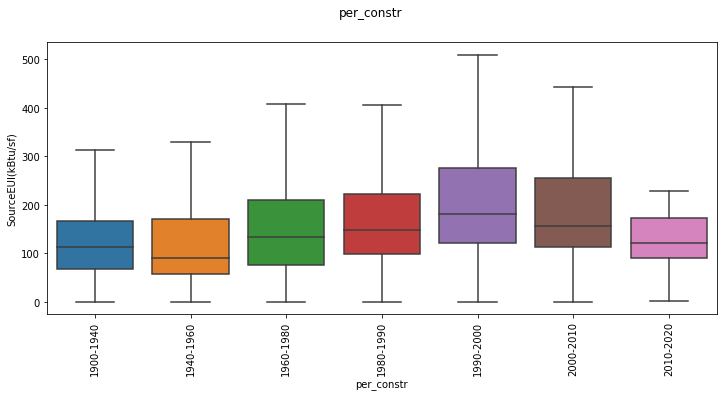

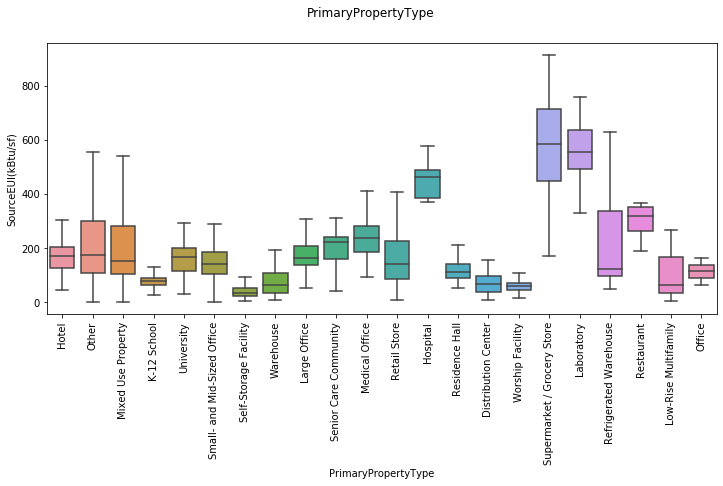

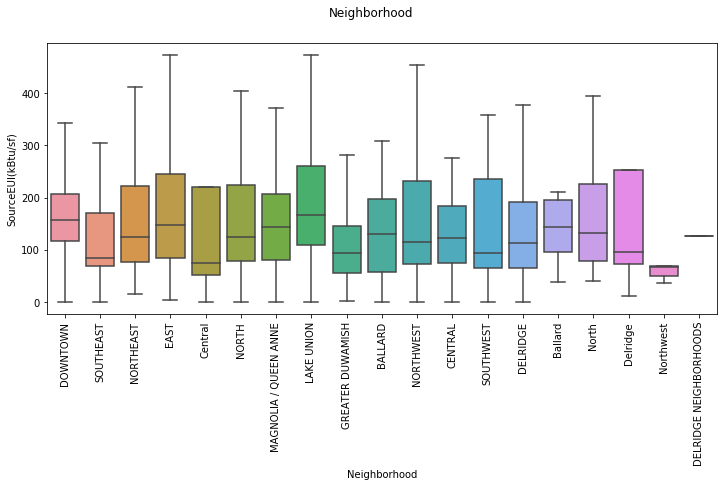

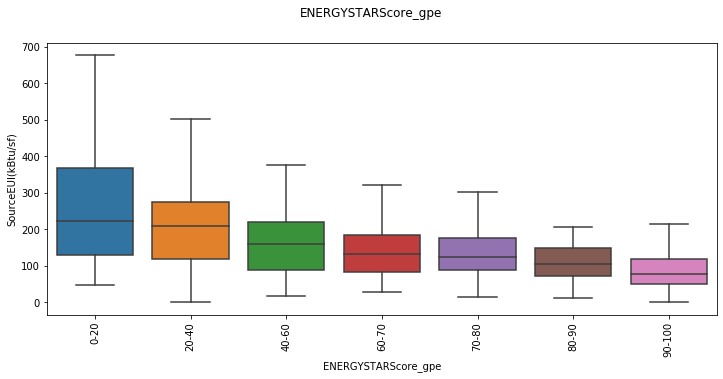

In [42]:
for c in ['per_constr', 'PrimaryPropertyType', 'Neighborhood', 'ENERGYSTARScore_gpe']:
    plt.figure(figsize=(12,5))
    sns.boxplot(y = 'SourceEUI(kBtu/sf)',  data = data1, x = c, showfliers=False)
    plt.suptitle(c)
    plt.xticks(rotation=90)
    plt.show()

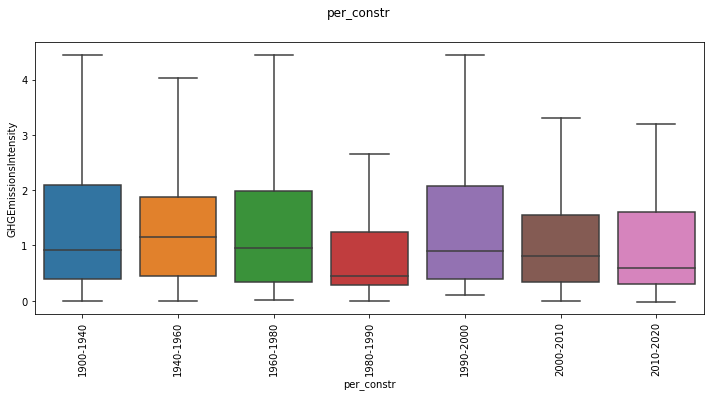

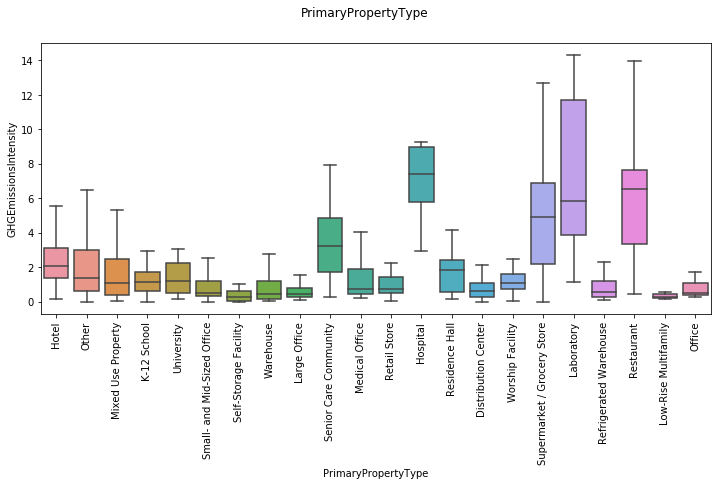

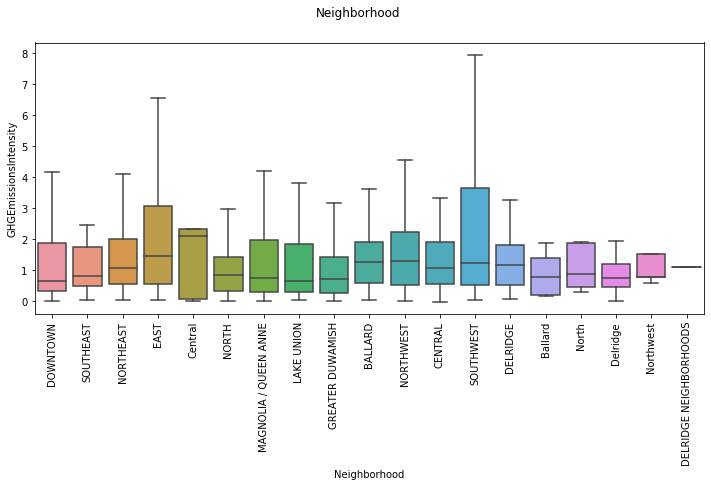

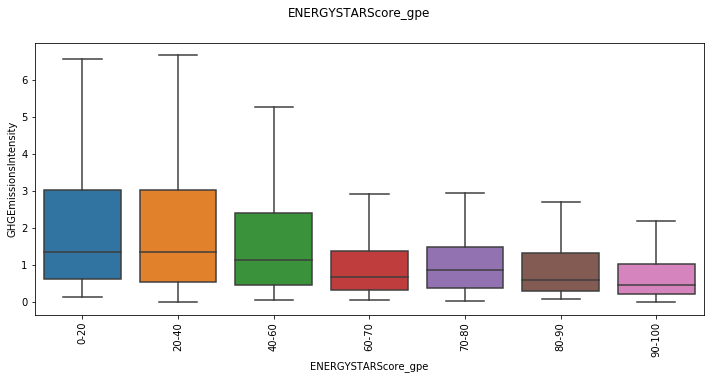

In [43]:
for c in ['per_constr', 'PrimaryPropertyType', 'Neighborhood', 'ENERGYSTARScore_gpe']:
    plt.figure(figsize=(12,5))
    sns.boxplot(y = 'GHGEmissionsIntensity',  data = data1, x = c, showfliers=False)
    plt.suptitle(c)
    plt.xticks(rotation=90)
    plt.show()

## 4. Préparation des données avant application des modèles

Je créé les partitions de test et d'entraînement.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing

# choix de la target
target = 'SourceEUI(kBtu/sf)'

# choix des variables  
variables = ['YearBuilt', 'proportion_Steam_log', 'proportion_Elec', 'proportion_Gas', 'NumberofFloors_log', 'ENERGYSTARScore'] + BuildType_feature_labels + Nbh_feature_labels + Property_types

data2 = data1[~np.isnan(data1[target])].copy()

indexNames = data2[np.isnan(data2['ENERGYSTARScore'])].index
data2.drop(indexNames , inplace=True)

indexNames = data2[data2[target] == 0].index
data2.drop(indexNames , inplace=True)

indexNames = data2[data2['Outlier'] == 'Low outlier'].index
data2.drop(indexNames , inplace=True)

indexNames = data2[data2['Outlier'] == 'High outlier'].index
data2.drop(indexNames , inplace=True)

In [45]:
# Préparation de la stratification test/split

nbquantiles = 5

# répartition par quantiles
repart_quantiles = pd.qcut(data2[target], nbquantiles)

# création d'un array, puis d'un dataframe avec les classes
array_classes = repart_quantiles.factorize()[0]

# ajout au dataframe global
data2['classes'] = array_classes

In [46]:
# split du jeu entier, stratifié selon l'argument classes
train, test = train_test_split(data2, train_size=0.8, random_state=494, stratify=data2['classes'])

In [47]:
# sélection de x et y pour les 2 jeux (train et test)
xtrain = train[variables]
xtest = test[variables]
ytrain = train[[target]]
ytest = test[[target]]

In [48]:
# centrage et réduction
std_scale = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = std_scale.transform(xtrain)
xtest_scaled = std_scale.transform(xtest)

## 5. Test des modèles de machine learning

Dans cette partie, je testerai les différents modèles de machine learning abordés lors de ce projet.  
J'appliquerai un GridSearchCV à chacun d'entre eux, je chercherai une première approximation de paramètres optimaux, et je noterai leurs performance (présentées au fur et à mesure du code, rassemblées en fin de partie) afin de pouvoir sélectionner un modèle final.

In [49]:
from sklearn import metrics, model_selection

folds = model_selection.KFold(n_splits=5, shuffle=True, random_state=166)

In [50]:
perf_reg_GridSearchCV = pd.DataFrame(columns=['Regression type', 'Score type', 'meilleurs paramètres', 'MAE', 'MSE', 'R2', 'Computing time'])

a. Regression ridge  
b. Lasso  
c. LinearSVR  
d. Kernel Ridge  
e. Perceptron  
f. Random Forest Regressor  
g. Gradient boosting  
h. Résultats

#### a. Regression ridge

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
ridge = Ridge()

In [52]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha':np.logspace(-5, 5, num = 11)}

In [53]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: regression ridge
reg = model_selection.GridSearchCV(
    Ridge(), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
reg.fit(xtrain_scaled, ytrain)

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        reg.cv_results_['mean_test_score'], # score moyen
        reg.cv_results_['std_test_score'],  # écart-type du score
        reg.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 100.0}
Résultats de la validation croisée :
neg_root_mean_squared_error = -106.956 (+/-89.263) for {'alpha': 1e-05}
neg_root_mean_squared_error = -106.955 (+/-89.263) for {'alpha': 0.0001}
neg_root_mean_squared_error = -106.953 (+/-89.263) for {'alpha': 0.001}
neg_root_mean_squared_error = -106.928 (+/-89.258) for {'alpha': 0.01}
neg_root_mean_squared_error = -106.783 (+/-89.059) for {'alpha': 0.1}
neg_root_mean_squared_error = -106.053 (+/-86.939) for {'alpha': 1.0}
neg_root_mean_squared_error = -102.859 (+/-77.842) for {'alpha': 10.0}
neg_root_mean_squared_error = -89.844 (+/-60.015) for {'alpha': 100.0}
neg_root_mean_squared_error = -127.875 (+/-80.670) for {'alpha': 1000.0}
neg_root_mean_squared_error = -167.783 (+/-96.482) for {'alpha': 10000.0}
neg_root_mean_squared_error = -175.417 (+/-98.145) for {'alpha': 100000.0}


In [54]:
ypred = reg.predict(xtest_scaled)
print("Meilleur paramètre: alpha = {}".format(reg.best_params_['alpha']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: alpha = 100.0
Erreur (MAE) sur le jeu de test : 32.942
Erreur (MSE) sur le jeu de test : 2339.233
Précision (R2) sur le jeu de test : 0.930
Computing time: 0.194 sec.


In [55]:
if ((perf_reg_GridSearchCV['Regression type'] == 'Regression ridge') & (perf_reg_GridSearchCV['Score type'] == 'neg_root_mean_squared_error')).any():
    indexNames = perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 'Regression ridge') & (perf_reg_GridSearchCV['Score type'])].index
    perf_reg_GridSearchCV.drop(indexNames , inplace=True)
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Regression ridge', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'alpha: ' + str(reg.best_params_['alpha']), 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)
else:
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Regression ridge', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'alpha: ' + str(reg.best_params_['alpha']), 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)

In [56]:
j = np.where(param_grid['alpha'] == reg.best_params_['alpha'])
print('Score par pli, meilleur paramètre:')
print("Score 1er pli:",np.around(reg.cv_results_['split0_test_score'][j],2))
print("Score 2e pli:",np.around(reg.cv_results_['split1_test_score'][j],2))
print("Score 3e pli:",np.around(reg.cv_results_['split2_test_score'][j],2))
print("Score 4e pli:",np.around(reg.cv_results_['split3_test_score'][j],2))
print("Score 5e pli:",np.around(reg.cv_results_['split4_test_score'][j],2))

Score par pli, meilleur paramètre:
Score 1er pli: [-86.56]
Score 2e pli: [-55.02]
Score 3e pli: [-97.39]
Score 4e pli: [-68.01]
Score 5e pli: [-142.24]


In [57]:
print('Score par pli, tous les cas envisagés:')
print("Alphas:",param_grid['alpha'])
print("Score 1er pli:",np.around(reg.cv_results_['split0_test_score'],2))
print("Score 2e pli:",np.around(reg.cv_results_['split1_test_score'],2))
print("Score 3e pli:",np.around(reg.cv_results_['split2_test_score'],2))
print("Score 4e pli:",np.around(reg.cv_results_['split3_test_score'],2))
print("Score 5e pli:",np.around(reg.cv_results_['split4_test_score'],2))
print("Position;:",reg.cv_results_['rank_test_score'])

Score par pli, tous les cas envisagés:
Alphas: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
Score 1er pli: [-178.87 -178.87 -178.86 -178.82 -178.37 -174.89 -159.05  -86.56 -158.92
 -221.42 -230.98]
Score 2e pli: [ -57.11  -57.11  -57.11  -57.11  -57.11  -57.06  -56.59  -55.02  -80.39
 -116.33 -123.98]
Score 3e pli: [ -95.39  -95.39  -95.39  -95.39  -95.35  -95.32  -95.31  -97.39 -121.74
 -150.4  -156.74]
Score 4e pli: [ -69.18  -69.18  -69.17  -69.1   -68.86  -68.7   -68.38  -68.01  -91.08
 -122.03 -128.6 ]
Score 5e pli: [-134.22 -134.22 -134.22 -134.22 -134.23 -134.3  -134.95 -142.24 -187.24
 -228.74 -236.79]
Position;: [ 8  7  6  5  4  3  2  1  9 10 11]


#### b. Lasso

In [58]:
from sklearn.linear_model import Lasso

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha':np.logspace(-5, 9, num = 15)}

In [59]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: regression ridge
las = model_selection.GridSearchCV(
    Lasso(max_iter=25000), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
las.fit(xtrain_scaled, ytrain)

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(las.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        las.cv_results_['mean_test_score'], # score moyen
        las.cv_results_['std_test_score'],  # écart-type du score
        las.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428398.5392320894, tolerance: 1954.2681274892886
  positive)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1533593.6737839454, tolerance: 2617.330643094159
  positive)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 869248.0328610148, tolerance: 2457.998037721152
  positive)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 10.0}
Résultats de la validation croisée :
neg_root_mean_squared_error = -106.944 (+/-89.254) for {'alpha': 1e-05}
neg_root_mean_squared_error = -106.945 (+/-89.254) for {'alpha': 0.0001}
neg_root_mean_squared_error = -106.913 (+/-89.190) for {'alpha': 0.001}
neg_root_mean_squared_error = -106.594 (+/-88.535) for {'alpha': 0.01}
neg_root_mean_squared_error = -105.208 (+/-85.027) for {'alpha': 0.1}
neg_root_mean_squared_error = -103.421 (+/-82.006) for {'alpha': 1.0}
neg_root_mean_squared_error = -98.196 (+/-61.037) for {'alpha': 10.0}
neg_root_mean_squared_error = -176.059 (+/-98.714) for {'alpha': 100.0}
neg_root_mean_squared_error = -176.364 (+/-98.318) for {'alpha': 1000.0}
neg_root_mean_squared_error = -176.364 (+/-98.318) for {'alpha': 10000.0}
neg_root_mean_squared_error = -176.364 (+/-98.318) for {'alpha': 100000.0}
neg_root_mean_squared_error = -176.364 (+/-98.318) for {'alpha': 1000000.0}
neg_root_mean_squared_

In [60]:
ypred = las.predict(xtest_scaled)
print("Meilleur paramètre: alpha = {}".format(las.best_params_['alpha']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: alpha = 10.0
Erreur (MAE) sur le jeu de test : 38.367
Erreur (MSE) sur le jeu de test : 2844.853
Précision (R2) sur le jeu de test : 0.915
Computing time: 10.219 sec.


In [61]:
if ((perf_reg_GridSearchCV['Regression type'] == 'Lasso') & (perf_reg_GridSearchCV['Score type'] == 'neg_root_mean_squared_error')).any():
    indexNames = perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 'Lasso') & (perf_reg_GridSearchCV['Score type'])].index
    perf_reg_GridSearchCV.drop(indexNames , inplace=True)
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Lasso', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'alpha: ' + str(las.best_params_['alpha']), 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)
else:
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Lasso', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'alpha: ' + str(las.best_params_['alpha']), 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)

In [62]:
j = np.where(param_grid['alpha'] == las.best_params_['alpha'])
print('Score par pli, meilleur paramètre:')
print("Score 1er pli:",np.around(las.cv_results_['split0_test_score'][j],2))
print("Score 2e pli:",np.around(las.cv_results_['split1_test_score'][j],2))
print("Score 3e pli:",np.around(las.cv_results_['split2_test_score'][j],2))
print("Score 4e pli:",np.around(las.cv_results_['split3_test_score'][j],2))
print("Score 5e pli:",np.around(las.cv_results_['split4_test_score'][j],2))

Score par pli, meilleur paramètre:
Score 1er pli: [-124.64]
Score 2e pli: [-57.72]
Score 3e pli: [-101.42]
Score 4e pli: [-70.05]
Score 5e pli: [-137.15]


In [63]:
print('Score par pli, tous les cas envisagés:')
print("Alphas:",param_grid['alpha'])
print("Score 1er pli:",np.around(las.cv_results_['split0_test_score'],2))
print("Score 2e pli:",np.around(las.cv_results_['split1_test_score'],2))
print("Score 3e pli:",np.around(las.cv_results_['split2_test_score'],2))
print("Score 4e pli:",np.around(las.cv_results_['split3_test_score'],2))
print("Score 5e pli:",np.around(las.cv_results_['split4_test_score'],2))
print("Position;:",las.cv_results_['rank_test_score'])

Score par pli, tous les cas envisagés:
Alphas: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09]
Score 1er pli: [-178.86 -178.85 -178.73 -177.53 -171.68 -165.76 -124.64 -232.12 -232.12
 -232.12 -232.12 -232.12 -232.12 -232.12 -232.12]
Score 2e pli: [ -57.1   -57.1   -57.11  -57.1   -56.94  -56.05  -57.72 -124.55 -124.94
 -124.94 -124.94 -124.94 -124.94 -124.94 -124.94]
Score 3e pli: [ -95.4   -95.39  -95.37  -95.26  -94.75  -94.24 -101.42 -156.67 -157.55
 -157.55 -157.55 -157.55 -157.55 -157.55 -157.55]
Score 4e pli: [ -69.18  -69.17  -69.14  -68.85  -68.56  -67.54  -70.05 -129.17 -129.42
 -129.42 -129.42 -129.42 -129.42 -129.42 -129.42]
Score 5e pli: [-134.19 -134.2  -134.22 -134.23 -134.12 -133.51 -137.15 -237.78 -237.78
 -237.78 -237.78 -237.78 -237.78 -237.78 -237.78]
Position;: [6 7 5 4 3 2 1 8 9 9 9 9 9 9 9]


#### c. LinearSVR

In [64]:
from sklearn.svm import LinearSVR

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'C':np.logspace(-5, 5, num = 11)}

In [65]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: LinearSVR
LSVR = model_selection.GridSearchCV(
    LinearSVR(fit_intercept=False, max_iter=25000), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
LSVR.fit(xtrain_scaled, ytrain.to_numpy()[:,0])

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(LSVR.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        LSVR.cv_results_['mean_test_score'], # score moyen
        LSVR.cv_results_['std_test_score'],  # écart-type du score
        LSVR.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

C:\Users\vince\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'C': 1e-05}
Résultats de la validation croisée :
neg_root_mean_squared_error = -243.936 (+/-82.152) for {'C': 1e-05}
neg_root_mean_squared_error = -243.939 (+/-82.152) for {'C': 0.0001}
neg_root_mean_squared_error = -243.975 (+/-82.151) for {'C': 0.001}
neg_root_mean_squared_error = -244.335 (+/-82.135) for {'C': 0.01}
neg_root_mean_squared_error = -248.159 (+/-82.056) for {'C': 0.1}
neg_root_mean_squared_error = -288.698 (+/-94.897) for {'C': 1.0}
neg_root_mean_squared_error = -899.583 (+/-421.470) for {'C': 10.0}
neg_root_mean_squared_error = -3891.241 (+/-2277.414) for {'C': 100.0}
neg_root_mean_squared_error = -6061.995 (+/-3565.002) for {'C': 1000.0}
neg_root_mean_squared_error = -7404.119 (+/-4079.497) for {'C': 10000.0}
neg_root_mean_squared_error = -7629.204 (+/-3789.584) for {'C': 100000.0}


C:\Users\vince\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [66]:
ypred = LSVR.predict(xtest_scaled)
print("Meilleur paramètre: C = {}".format(LSVR.best_params_['C']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: C = 1e-05
Erreur (MAE) sur le jeu de test : 159.947
Erreur (MSE) sur le jeu de test : 58964.615
Précision (R2) sur le jeu de test : -0.766
Computing time: 27.517 sec.


In [67]:
if ((perf_reg_GridSearchCV['Regression type'] == 'Linear SVR') & (perf_reg_GridSearchCV['Score type'] == 'neg_root_mean_squared_error')).any():
    indexNames = perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 'Linear SVR') & (perf_reg_GridSearchCV['Score type'])].index
    perf_reg_GridSearchCV.drop(indexNames , inplace=True)
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Linear SVR', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'C: ' + str(LSVR.best_params_['C']), 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)
else:
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Linear SVR', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'C: ' + str(LSVR.best_params_['C']), 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)

In [68]:
j = np.where(param_grid['C'] == LSVR.best_params_['C'])
print('Score par pli, meilleur paramètre:')
print("Score 1er pli:",np.around(LSVR.cv_results_['split0_test_score'][j],2))
print("Score 2e pli:",np.around(LSVR.cv_results_['split1_test_score'][j],2))
print("Score 3e pli:",np.around(LSVR.cv_results_['split2_test_score'][j],2))
print("Score 4e pli:",np.around(LSVR.cv_results_['split3_test_score'][j],2))
print("Score 5e pli:",np.around(LSVR.cv_results_['split4_test_score'][j],2))

Score par pli, meilleur paramètre:
Score 1er pli: [-289.96]
Score 2e pli: [-195.27]
Score 3e pli: [-239.97]
Score 4e pli: [-203.]
Score 5e pli: [-291.46]


In [69]:
print('Score par pli, tous les cas envisagés:')
print("C:",param_grid['C'])
print("Score 1er pli:",np.around(LSVR.cv_results_['split0_test_score'],2))
print("Score 2e pli:",np.around(LSVR.cv_results_['split1_test_score'],2))
print("Score 3e pli:",np.around(LSVR.cv_results_['split2_test_score'],2))
print("Score 4e pli:",np.around(LSVR.cv_results_['split3_test_score'],2))
print("Score 5e pli:",np.around(LSVR.cv_results_['split4_test_score'],2))
print("Position;:",LSVR.cv_results_['rank_test_score'])

Score par pli, tous les cas envisagés:
C: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
Score 1er pli: [  -289.96   -289.97   -290.01   -290.43   -294.94   -351.76  -1185.06
  -3894.13  -6277.92 -10729.42 -10847.24]
Score 2e pli: [ -195.27  -195.28  -195.31  -195.61  -198.98  -235.49  -804.76 -5285.52
 -7119.11 -7367.6  -7520.79]
Score 3e pli: [ -239.97  -239.98  -240.03  -240.56  -245.95  -295.18  -973.23 -4440.78
 -7152.34 -7272.2  -7416.44]
Score 4e pli: [ -203.    -203.01  -203.04  -203.38  -206.91  -234.31  -553.88 -1835.67
 -2562.89 -4285.61 -4888.  ]
Score 5e pli: [ -291.46  -291.46  -291.48  -291.69  -294.02  -326.75  -980.99 -4000.11
 -7197.71 -7365.76 -7473.55]
Position;: [ 1  2  3  4  5  6  7  8  9 10 11]


#### d. Kernel Ridge

In [70]:
from sklearn import kernel_ridge

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha':np.logspace(-5, 5, num = 11), 'gamma':np.logspace(-5, 5, num = 11)}
#param_grid = {'alpha':np.logspace(-5, 5, num = 11), 'gamma':[1, 1, 1, 1, 1]}

In [71]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: kernel ridge
krid = model_selection.GridSearchCV(
    kernel_ridge.KernelRidge(kernel='rbf'), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
krid.fit(xtrain_scaled, ytrain)

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(krid.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        krid.cv_results_['mean_test_score'], # score moyen
        krid.cv_results_['std_test_score'],  # écart-type du score
        krid.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.01, 'gamma': 0.001}
Résultats de la validation croisée :
neg_root_mean_squared_error = -102.905 (+/-78.438) for {'alpha': 1e-05, 'gamma': 1e-05}
neg_root_mean_squared_error = -98.708 (+/-54.906) for {'alpha': 1e-05, 'gamma': 0.0001}
neg_root_mean_squared_error = -142.661 (+/-111.708) for {'alpha': 1e-05, 'gamma': 0.001}
neg_root_mean_squared_error = -171.215 (+/-90.760) for {'alpha': 1e-05, 'gamma': 0.01}
neg_root_mean_squared_error = -174.789 (+/-129.283) for {'alpha': 1e-05, 'gamma': 0.1}
neg_root_mean_squared_error = -216.415 (+/-107.350) for {'alpha': 1e-05, 'gamma': 1.0}
neg_root_mean_squared_error = -240.060 (+/-87.058) for {'alpha': 1e-05, 'gamma': 10.0}
neg_root_mean_squared_error = -242.421 (+/-84.283) for {'alpha': 1e-05, 'gamma': 100.0}
neg_root_mean_squared_error = -243.935 (+/-82.152) for {'alpha': 1e-05, 'gamma': 1000.0}
neg_root_mean_squared_error = -243.935 (+/-82.152) for {'alpha': 1e-05, 'gamma': 100

In [72]:
ypred = krid.predict(xtest_scaled)
print("Meilleur paramètre: alpha = {}".format(krid.best_params_['alpha']))
print("Meilleur paramètre: gamma = {}".format(krid.best_params_['gamma']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: alpha = 0.01
Meilleur paramètre: gamma = 0.001
Erreur (MAE) sur le jeu de test : 32.267
Erreur (MSE) sur le jeu de test : 3235.080
Précision (R2) sur le jeu de test : 0.903
Computing time: 17.502 sec.


In [73]:
if ((perf_reg_GridSearchCV['Regression type'] == 'Kernel ridge') & (perf_reg_GridSearchCV['Score type'] == 'neg_root_mean_squared_error')).any():
    indexNames = perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 'Kernel ridge') & (perf_reg_GridSearchCV['Score type'])].index
    perf_reg_GridSearchCV.drop(indexNames , inplace=True)
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Kernel ridge', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'alpha: ' + str(krid.best_params_['alpha']) + ', gamma: ' + str(krid.best_params_['gamma']) , 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)
else:
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Kernel ridge', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'alpha: ' + str(krid.best_params_['alpha']) + ', gamma: ' + str(krid.best_params_['gamma']) , 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)

In [74]:
i_alpha = np.where(param_grid['alpha'] == krid.best_params_['alpha'])
j_gamma =  np.where(param_grid['gamma'] == krid.best_params_['gamma'])
k = i_alpha[0] * len(param_grid['gamma']) + j_gamma[0] - 1
print('Score par pli, meilleur paramètre:')
print("Score 1er pli:",np.around(krid.cv_results_['split0_test_score'][k],2))
print("Score 2e pli:",np.around(krid.cv_results_['split1_test_score'][k],2))
print("Score 3e pli:",np.around(krid.cv_results_['split2_test_score'][k],2))
print("Score 4e pli:",np.around(krid.cv_results_['split3_test_score'][k],2))
print("Score 5e pli:",np.around(krid.cv_results_['split4_test_score'][k],2))

Score par pli, meilleur paramètre:
Score 1er pli: [-106.72]
Score 2e pli: [-55.33]
Score 3e pli: [-95.84]
Score 4e pli: [-67.64]
Score 5e pli: [-137.34]


In [75]:
print('Score par pli, tous les cas envisagés:')
print("Alphas:",param_grid['alpha'])
print("Gammas:",param_grid['gamma'])
print("Score 1er pli:",np.around(krid.cv_results_['split0_test_score'],2))
print("Score 2e pli:",np.around(krid.cv_results_['split1_test_score'],2))
print("Score 3e pli:",np.around(krid.cv_results_['split2_test_score'],2))
print("Score 4e pli:",np.around(krid.cv_results_['split3_test_score'],2))
print("Score 5e pli:",np.around(krid.cv_results_['split4_test_score'],2))
print("Position;:",krid.cv_results_['rank_test_score'])

Score par pli, tous les cas envisagés:
Alphas: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
Gammas: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
Score 1er pli: [-162.12 -115.15 -143.31 -241.15 -246.67 -273.44 -289.2  -289.93 -289.96
 -289.96 -289.96 -163.84 -101.56 -121.85 -218.88 -246.17 -273.44 -289.2
 -289.93 -289.96 -289.96 -289.96 -115.39 -142.36  -75.32 -209.05 -245.3
 -273.44 -289.21 -289.93 -289.96 -289.96 -289.96 -119.63 -106.72  -72.64
 -203.66 -244.03 -273.5  -289.21 -289.93 -289.96 -289.96 -289.96 -212.14
 -123.52  -75.4  -202.84 -242.58 -274.08 -289.25 -289.93 -289.96 -289.96
 -289.96 -229.95 -213.45 -156.93 -209.85 -246.47 -278.17 -289.51 -289.95
 -289.96 -289.96 -289.96 -232.08 -230.79 -224.04 -230.59 -265.63 -286.34
 -289.87 -289.96 -289.96 -289.96 -289.96 -233.94 -234.39 -238.32 -249.92
 -282.56 -289.49 -289.95 -289.96 -289.96 -289.96 -289.96 -255.39 -255.85
 -259.63 -273.01 -288.95 -289.92 -289.96 -

#### e. Perceptron

In [76]:
from sklearn.neural_network import MLPRegressor

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha':np.logspace(-5, 5, num = 11), 'hidden_layer_sizes': [(10,), (50,), (100,)]}

In [77]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: kernel ridge
perceptron = model_selection.GridSearchCV(
    MLPRegressor(max_iter = 500), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
perceptron.fit(xtrain_scaled, ytrain.values.ravel())

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(perceptron.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        perceptron.cv_results_['mean_test_score'], # score moyen
        perceptron.cv_results_['std_test_score'],  # écart-type du score
        perceptron.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 1000.0, 'hidden_layer_sizes': (100,)}
Résultats de la validation croisée :
neg_root_mean_squared_error = -151.499 (+/-97.024) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,)}
neg_root_mean_squared_error = -104.712 (+/-87.674) for {'alpha': 1e-05, 'hidden_layer_sizes': (50,)}
neg_root_mean_squared_error = -95.601 (+/-68.833) for {'alpha': 1e-05, 'hidden_layer_sizes': (100,)}
neg_root_mean_squared_error = -150.660 (+/-118.678) for {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
neg_root_mean_squared_error = -104.985 (+/-81.834) for {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
neg_root_mean_squared_error = -94.295 (+/-63.005) for {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
neg_root_mean_squared_error = -151.305 (+/-94.080) for {'alpha': 0.001, 'hidden_layer_sizes': (10,)}
neg_root_mean_squared_error = -103.660 (+/-80.811) for {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
neg_root_mean_squared_error = -96.074 (+/-66.4

C:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [78]:
ypred = perceptron.predict(xtest_scaled)
print("Meilleur paramètre: alpha = {}".format(perceptron.best_params_['alpha']))
print("Meilleur paramètre: hidden_layer_sizes = {}".format(perceptron.best_params_['hidden_layer_sizes']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: alpha = 1000.0
Meilleur paramètre: hidden_layer_sizes = (100,)
Erreur (MAE) sur le jeu de test : 30.470
Erreur (MSE) sur le jeu de test : 1949.071
Précision (R2) sur le jeu de test : 0.942
Computing time: 194.726 sec.


In [79]:
if ((perf_reg_GridSearchCV['Regression type'] == 'Perceptron') & (perf_reg_GridSearchCV['Score type'] == 'neg_root_mean_squared_error')).any():
    perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 1) & (perf_reg_GridSearchCV['Score type'] == 2)]['meilleurs paramètres'] = 'alpha: ' + str(perceptron.best_params_['alpha']) + ', hidden_layer_sizes: ' + str(perceptron.best_params_['hidden_layer_sizes'])
    perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 1) & (perf_reg_GridSearchCV['Score type'] == 2)]['MAE'] = metrics.mean_absolute_error(ytest, ypred)
    perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 1) & (perf_reg_GridSearchCV['Score type'] == 2)]['MSE'] = metrics.mean_squared_error(ytest, ypred)
    perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 1) & (perf_reg_GridSearchCV['Score type'] == 2)]['R2'] = metrics.r2_score(ytest, ypred)
    perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 1) & (perf_reg_GridSearchCV['Score type'] == 2)]['Computing time'] = CPtime
else:
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'perceptron', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'alpha: ' + str(perceptron.best_params_['alpha']) + ', hidden_layer_sizes: ' + str(perceptron.best_params_['hidden_layer_sizes']) , 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)

In [80]:
i_alpha = np.where(param_grid['alpha'] == perceptron.best_params_['alpha'])
j_hid =  param_grid['hidden_layer_sizes'].index(perceptron.best_params_['hidden_layer_sizes'])
k = i_alpha[0] * len(param_grid['hidden_layer_sizes']) + j_hid
print('Score par pli, meilleur paramètre:')
print("Score 1er pli:",np.around(perceptron.cv_results_['split0_test_score'][k],2))
print("Score 2e pli:",np.around(perceptron.cv_results_['split1_test_score'][k],2))
print("Score 3e pli:",np.around(perceptron.cv_results_['split2_test_score'][k],2))
print("Score 4e pli:",np.around(perceptron.cv_results_['split3_test_score'][k],2))
print("Score 5e pli:",np.around(perceptron.cv_results_['split4_test_score'][k],2))

Score par pli, meilleur paramètre:
Score 1er pli: [-81.19]
Score 2e pli: [-55.32]
Score 3e pli: [-94.47]
Score 4e pli: [-61.99]
Score 5e pli: [-150.44]


In [81]:
print('Score par pli, tous les cas envisagés:')
print("Alphas:",param_grid['alpha'])
print("hidden_layer_sizes:",param_grid['hidden_layer_sizes'])
print("Score 1er pli:",np.around(perceptron.cv_results_['split0_test_score'],2))
print("Score 2e pli:",np.around(perceptron.cv_results_['split1_test_score'],2))
print("Score 3e pli:",np.around(perceptron.cv_results_['split2_test_score'],2))
print("Score 4e pli:",np.around(perceptron.cv_results_['split3_test_score'],2))
print("Score 5e pli:",np.around(perceptron.cv_results_['split4_test_score'],2))
print("Position;:",perceptron.cv_results_['rank_test_score'])

Score par pli, tous les cas envisagés:
Alphas: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
hidden_layer_sizes: [(10,), (50,), (100,)]
Score 1er pli: [-192.35 -101.99  -87.3  -199.04 -106.16  -89.15 -189.61 -104.21  -88.07
 -185.81 -105.49  -87.61 -185.02 -111.73  -87.69 -196.57 -108.    -85.41
 -177.6  -103.5   -87.45 -197.68 -105.2   -80.88 -177.61  -77.35  -81.19
 -217.05 -125.27 -116.9  -282.43 -263.6  -252.28]
Score 2e pli: [ -82.53  -64.68  -64.89  -91.53  -66.47  -64.79  -88.42  -66.64  -64.59
  -87.52  -64.89  -63.39  -83.57  -62.93  -65.02 -108.83  -65.01  -63.55
  -80.37  -64.08  -64.45  -88.02  -64.55  -61.99 -110.99  -60.75  -55.32
 -140.6   -62.99  -61.47 -185.49 -160.74 -147.32]
Score 3e pli: [-156.74  -96.74  -92.15 -126.82  -98.43  -91.68 -151.75  -95.39  -96.26
 -126.59  -96.06  -94.72 -136.01  -97.48  -93.56 -130.34  -96.77  -94.53
 -146.49  -96.48  -94.01 -138.2   -97.7   -92.69 -132.46  -99.24  -94.47
 -173.61 -111.47 -108.08 -230.

#### f. Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'min_samples_split' : [2, 5, 10], 'max_features' : ['auto', 'sqrt'], 'max_depth': [5, 20, 50, None], 'min_samples_leaf': [1, 2, 5]}

In [83]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: kernel ridge
rf = model_selection.GridSearchCV(
    RandomForestRegressor(), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
rf.fit(xtrain_scaled, ytrain.values.ravel())

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(rf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        rf.cv_results_['mean_test_score'], # score moyen
        rf.cv_results_['std_test_score'],  # écart-type du score
        rf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
Résultats de la validation croisée :
neg_root_mean_squared_error = -114.447 (+/-108.893) for {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
neg_root_mean_squared_error = -114.420 (+/-106.655) for {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
neg_root_mean_squared_error = -112.514 (+/-109.437) for {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
neg_root_mean_squared_error = -97.701 (+/-53.210) for {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
neg_root_mean_squared_error = -101.690 (+/-61.727) for {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
neg_root_mean_squared_error = -99.694 (+/-59.896) for {'max_depth': 5, 'max_features': 'auto', 'min

In [84]:
ypred = rf.predict(xtest_scaled)
print("Meilleur paramètre: min_samples_split = {}".format(rf.best_params_['min_samples_split']))
print("Meilleur paramètre: max_features = {}".format(rf.best_params_['max_features']))
print("Meilleur paramètre: max_depth = {}".format(rf.best_params_['max_depth']))
print("Meilleur paramètre: min_samples_leaf = {}".format(rf.best_params_['min_samples_leaf']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: min_samples_split = 2
Meilleur paramètre: max_features = auto
Meilleur paramètre: max_depth = 50
Meilleur paramètre: min_samples_leaf = 2
Erreur (MAE) sur le jeu de test : 29.672
Erreur (MSE) sur le jeu de test : 2014.651
Précision (R2) sur le jeu de test : 0.940
Computing time: 76.126 sec.


In [85]:
if ((perf_reg_GridSearchCV['Regression type'] == 'Random Forest Regressor') & (perf_reg_GridSearchCV['Score type'] == 'neg_root_mean_squared_error')).any():
    indexNames = perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 'Random Forest Regressor') & (perf_reg_GridSearchCV['Score type'])].index
    perf_reg_GridSearchCV.drop(indexNames , inplace=True)
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Random Forest Regressor', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'max_features: ' + str(rf.best_params_['max_features'] + ', min_samples_split: ' + str(rf.best_params_['min_samples_split']) + ', max_depth: ' + str(rf.best_params_['max_depth']) + ', min_samples_leaf: ' + str(rf.best_params_['min_samples_leaf'])) , 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)
else:
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'Random Forest Regressor', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'max_features: ' + str(rf.best_params_['max_features'] + ', min_samples_split: ' + str(rf.best_params_['min_samples_split']) + ', max_depth: ' + str(rf.best_params_['max_depth']) + ', min_samples_leaf: ' + str(rf.best_params_['min_samples_leaf'])) , 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)

In [86]:
print('Score par pli, tous les cas envisagés:')
print("max_features:",param_grid['max_features'])
print("min_samples_split:",param_grid['min_samples_split'])
print("max_depth:",param_grid['max_depth'])
print("min_samples_leaf:",param_grid['min_samples_leaf'])
print("Score 1er pli:",np.around(rf.cv_results_['split0_test_score'],2))
print("Score 2e pli:",np.around(rf.cv_results_['split1_test_score'],2))
print("Score 3e pli:",np.around(rf.cv_results_['split2_test_score'],2))
print("Score 4e pli:",np.around(rf.cv_results_['split3_test_score'],2))
print("Score 5e pli:",np.around(rf.cv_results_['split4_test_score'],2))
print("Position;:",rf.cv_results_['rank_test_score'])

Score par pli, tous les cas envisagés:
max_features: ['auto', 'sqrt']
min_samples_split: [2, 5, 10]
max_depth: [5, 20, 50, None]
min_samples_leaf: [1, 2, 5]
Score 1er pli: [-109.65 -111.97 -101.31 -121.24 -125.3  -121.25 -176.06 -172.51 -177.63
 -174.39 -175.15 -177.74 -176.54 -187.31 -193.6  -204.77 -202.58 -203.76
  -90.46 -110.26 -105.76 -109.12 -108.34 -114.29 -171.35 -171.05 -173.39
 -150.04 -146.03 -152.37 -169.85 -167.5  -168.06 -197.55 -201.83 -202.35
  -96.92  -97.3   -93.71 -108.76 -109.94 -113.28 -181.33 -171.94 -170.1
 -154.71 -148.75 -141.05 -179.22 -170.65 -172.44 -195.4  -198.04 -201.15
  -93.48  -94.22  -89.33 -106.27 -106.15 -110.76 -173.96 -166.36 -173.17
 -150.94 -140.7  -154.85 -167.93 -167.41 -164.4  -196.34 -196.48 -198.3 ]
Score 2e pli: [-70.66 -69.87 -69.09 -69.21 -69.22 -67.23 -66.82 -64.12 -66.16 -84.57
 -82.99 -83.52 -85.34 -87.1  -83.93 -82.93 -87.58 -84.33 -59.68 -58.19
 -56.   -58.54 -59.11 -56.69 -56.26 -55.24 -54.86 -61.64 -59.39 -63.05
 -64.42 -66.76 -6

#### g. Gradient boosting

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'max_depth'    : [4,6,8,10]}

In [88]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: kernel ridge
GBR = model_selection.GridSearchCV(
    GradientBoostingRegressor(), # algo
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
GBR.fit(xtrain_scaled, ytrain.values.ravel())

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(GBR.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        GBR.cv_results_['mean_test_score'], # score moyen
        GBR.cv_results_['std_test_score'],  # écart-type du score
        GBR.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 0.04, 'max_depth': 10, 'subsample': 0.5}
Résultats de la validation croisée :
neg_root_mean_squared_error = -129.502 (+/-105.515) for {'learning_rate': 0.01, 'max_depth': 4, 'subsample': 0.9}
neg_root_mean_squared_error = -128.763 (+/-102.844) for {'learning_rate': 0.01, 'max_depth': 4, 'subsample': 0.5}
neg_root_mean_squared_error = -131.063 (+/-103.037) for {'learning_rate': 0.01, 'max_depth': 4, 'subsample': 0.2}
neg_root_mean_squared_error = -134.396 (+/-105.219) for {'learning_rate': 0.01, 'max_depth': 4, 'subsample': 0.1}
neg_root_mean_squared_error = -122.191 (+/-108.937) for {'learning_rate': 0.01, 'max_depth': 6, 'subsample': 0.9}
neg_root_mean_squared_error = -122.919 (+/-105.772) for {'learning_rate': 0.01, 'max_depth': 6, 'subsample': 0.5}
neg_root_mean_squared_error = -127.723 (+/-107.387) for {'learning_rate': 0.01, 'max_depth': 6, 'subsample': 0.2}
neg_root_mean_squared_error = -135.639 (+/-111.51

In [89]:
ypred = GBR.predict(xtest_scaled)
print("Meilleur paramètre: learning_rate = {}".format(GBR.best_params_['learning_rate']))
print("Meilleur paramètre: subsample = {}".format(GBR.best_params_['subsample']))
print("Meilleur paramètre: max_depth = {}".format(GBR.best_params_['max_depth']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: learning_rate = 0.04
Meilleur paramètre: subsample = 0.5
Meilleur paramètre: max_depth = 10
Erreur (MAE) sur le jeu de test : 26.900
Erreur (MSE) sur le jeu de test : 2006.257
Précision (R2) sur le jeu de test : 0.940
Computing time: 42.418 sec.


In [90]:
if ((perf_reg_GridSearchCV['Regression type'] == 'GradientBoostingRegressor') & (perf_reg_GridSearchCV['Score type'] == 'neg_root_mean_squared_error')).any():
    indexNames = perf_reg_GridSearchCV[(perf_reg_GridSearchCV['Regression type'] == 'GradientBoostingRegressor') & (perf_reg_GridSearchCV['Score type'])].index
    perf_reg_GridSearchCV.drop(indexNames , inplace=True)
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'GradientBoostingRegressor', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'learning_rate: ' + str(GBR.best_params_['learning_rate']) + ', subsample: ' + str(GBR.best_params_['subsample']) + ', max_depth: ' + str(GBR.best_params_['max_depth']) , 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)
else:
    perf_reg_GridSearchCV = perf_reg_GridSearchCV.append({'Regression type': 'GradientBoostingRegressor', 'Score type': 'neg_root_mean_squared_error', 'meilleurs paramètres': 'learning_rate: ' + str(GBR.best_params_['learning_rate']) + ', subsample: ' + str(GBR.best_params_['subsample']) + ', max_depth: ' + str(GBR.best_params_['max_depth']) , 'MAE': metrics.mean_absolute_error(ytest, ypred), 'MSE': metrics.mean_squared_error(ytest, ypred), 'R2': metrics.r2_score(ytest, ypred), 'Computing time': CPtime}, ignore_index=True)

In [91]:
print('Score par pli, tous les cas envisagés:')
print("max_features:",param_grid['learning_rate'])
print("min_samples_split:",param_grid['subsample'])
print("max_depth:",param_grid['max_depth'])
print("Score 1er pli:",np.around(GBR.cv_results_['split0_test_score'],2))
print("Score 2e pli:",np.around(GBR.cv_results_['split1_test_score'],2))
print("Score 3e pli:",np.around(GBR.cv_results_['split2_test_score'],2))
print("Score 4e pli:",np.around(GBR.cv_results_['split3_test_score'],2))
print("Score 5e pli:",np.around(GBR.cv_results_['split4_test_score'],2))
print("Position;:",GBR.cv_results_['rank_test_score'])

Score par pli, tous les cas envisagés:
max_features: [0.01, 0.02, 0.03, 0.04]
min_samples_split: [0.9, 0.5, 0.2, 0.1]
max_depth: [4, 6, 8, 10]
Score 1er pli: [-135.18 -145.82 -178.68 -183.21 -129.72 -142.22 -172.91 -192.41 -128.23
 -143.72 -170.42 -189.13 -127.94 -147.79 -172.66 -188.37 -103.55 -110.53
 -140.82 -174.47  -96.98 -107.74 -138.72 -155.21  -92.63 -108.32 -150.65
 -165.81  -95.86 -110.17 -141.29 -160.02  -93.04  -94.2  -133.58 -140.06
  -82.87  -93.04 -119.57 -149.69  -79.16  -84.36 -118.57 -162.73  -83.5
  -84.79 -119.92 -154.55  -86.93  -84.3  -106.9  -144.72  -77.35  -87.45
 -110.72 -153.98  -77.1   -82.43 -111.72 -127.14  -78.3   -81.7  -115.72
 -123.45]
Score 2e pli: [-78.99 -77.36 -75.73 -79.64 -71.55 -71.02 -70.69 -76.2  -67.97 -67.28
 -67.62 -74.5  -65.01 -65.93 -67.35 -71.26 -66.69 -65.62 -63.31 -65.78
 -64.95 -61.28 -57.46 -62.89 -60.76 -60.27 -57.11 -63.08 -60.92 -58.89
 -58.89 -59.79 -63.21 -62.58 -57.54 -62.74 -64.18 -60.97 -56.32 -60.05
 -64.01 -61.54 -55.9  -5

#### h. Résultats

Voici la table reprenant les résultats:

In [92]:
perf_reg_GridSearchCV

,Regression type,Score type,meilleurs paramètres,MAE,MSE,R2,Computing time
0,Regression ridge,neg_root_mean_squared_error,alpha: 100.0,32.941921,2339.232600,0.929925,0.194191
1,Lasso,neg_root_mean_squared_error,alpha: 10.0,38.366568,2844.852937,0.914778,10.218975
2,Linear SVR,neg_root_mean_squared_error,C: 1e-05,159.946759,58964.614834,-0.766378,27.517310
3,Kernel ridge,neg_root_mean_squared_error,"alpha: 0.01, gamma: 0.001",32.267446,3235.079558,0.903088,17.501863
4,perceptron,neg_root_mean_squared_error,"alpha: 1000.0, hidden_layer_sizes: (100,)",30.470377,1949.070557,0.941613,194.726120
5,Random Forest Regressor,neg_root_mean_squared_error,"max_features: auto, min_samples_split: 2, max_...",29.671650,2014.650983,0.939648,76.125850
6,GradientBoostingRegressor,neg_root_mean_squared_error,"learning_rate: 0.04, subsample: 0.5, max_depth...",26.899715,2006.256815,0.939899,42.418153


## 6. Modèle sélectionné: affinage des paramètres et Feature importance

Le modèle que je souhaite sélectionner est la Regression ridge. C'est le modèle le plus rapide, qui donne également de bons résultats.  
  
Dans l'idée d'apprendre davantage de ce projet, j'essaierai aussi le Lasso, pour sa capacité à éliminer des variables.

#### a. Regression ridge

#### a. i) Regression ridge: Affinage des paramètres

In [93]:
from sklearn.linear_model import Ridge

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha':np.logspace(1, 3, num = 100)}

In [94]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: regression ridge
ridge = model_selection.GridSearchCV(
    Ridge(), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
ridge.fit(xtrain_scaled, ytrain)

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(ridge.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        ridge.cv_results_['mean_test_score'], # score moyen
        ridge.cv_results_['std_test_score'],  # écart-type du score
        ridge.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 135.30477745798075}
Résultats de la validation croisée :
neg_root_mean_squared_error = -102.859 (+/-77.842) for {'alpha': 10.0}
neg_root_mean_squared_error = -102.729 (+/-77.493) for {'alpha': 10.476157527896646}
neg_root_mean_squared_error = -102.593 (+/-77.132) for {'alpha': 10.974987654930562}
neg_root_mean_squared_error = -102.453 (+/-76.761) for {'alpha': 11.497569953977356}
neg_root_mean_squared_error = -102.308 (+/-76.378) for {'alpha': 12.045035402587823}
neg_root_mean_squared_error = -102.157 (+/-75.983) for {'alpha': 12.618568830660204}
neg_root_mean_squared_error = -102.000 (+/-75.577) for {'alpha': 13.219411484660288}
neg_root_mean_squared_error = -101.839 (+/-75.159) for {'alpha': 13.848863713938732}
neg_root_mean_squared_error = -101.671 (+/-74.729) for {'alpha': 14.508287784959395}
neg_root_mean_squared_error = -101.497 (+/-74.287) for {'alpha': 15.199110829529339}
neg_root_mean_squared_error = -101.317 (

In [95]:
ypred = ridge.predict(xtest_scaled)
print("Meilleur paramètre: alpha = {}".format(ridge.best_params_['alpha']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: alpha = 135.30477745798075
Erreur (MAE) sur le jeu de test : 33.505
Erreur (MSE) sur le jeu de test : 2575.011
Précision (R2) sur le jeu de test : 0.923
Computing time: 1.180 sec.


In [96]:
j = np.where(param_grid['alpha'] == ridge.best_params_['alpha'])
print('Score par pli (neg_root_mean_squared_error), meilleur paramètre:')
print("Score 1er pli:",np.around(ridge.cv_results_['split0_test_score'][j],2))
print("Score 2e pli:",np.around(ridge.cv_results_['split1_test_score'][j],2))
print("Score 3e pli:",np.around(ridge.cv_results_['split2_test_score'][j],2))
print("Score 4e pli:",np.around(ridge.cv_results_['split3_test_score'][j],2))
print("Score 5e pli:",np.around(ridge.cv_results_['split4_test_score'][j],2))

Score par pli (neg_root_mean_squared_error), meilleur paramètre:
Score 1er pli: [-77.04]
Score 2e pli: [-55.4]
Score 3e pli: [-98.62]
Score 4e pli: [-68.62]
Score 5e pli: [-145.15]


In [97]:
IX = data2[variables]
IGREC = data2[[target]]
IX_scaled = std_scale.transform(IX)

from sklearn.model_selection import cross_val_score
ridge2 = Ridge(alpha = 135.30477745798075, max_iter=100000)
bloup = cross_val_score(ridge2, IX_scaled, IGREC, cv=5, scoring='r2')

print('cross_val_score: ' + str(bloup))
print('Moyenne: ' + str(bloup.mean()))
print('Ecart-type: '+ str(bloup.std()))

cross_val_score: [0.9265058  0.64711955 0.56470004 0.76524717 0.88795558]
Moyenne: 0.7583056289522735
Ecart-type: 0.13783617854644534


#### a. ii) Regression ridge: Calcul de l'importance des différents features

In [98]:
a = ridge.best_params_['alpha']

ridge = Ridge()

ridge.set_params(alpha=a)
ridge.fit(xtrain_scaled, ytrain)
R2_ridge = ridge.score(xtest_scaled, ytest, sample_weight=None)
print('R2: ' + str(R2_ridge))
coefs = ridge.coef_.ravel()
Features_ridge = pd.DataFrame(np.concatenate((np.array(variables).reshape(len(np.array(variables)),1), coefs.reshape(len(coefs),1)), axis = 1), columns = ['Variable', 'Coef'])

R2: 0.9228614803763153


In [99]:
def variable_family (row):
    y = 'Nop'
    if row['Variable'] == 'YearBuilt':
        y = 'Year'
    if row['Variable'] in ['proportion_Steam', 'proportion_Elec', 'proportion_Gas']:
        y = 'Energy type'
    if row['Variable'] in BuildType_feature_labels:
        y = 'Building type'
    if row['Variable'] in Nbh_feature_labels:
        y = 'Neighborhood'
    if row['Variable'] in Property_types:
        y = 'Property type'
    return y
        
Features_ridge['Variable family'] = Features_ridge.apply(lambda x: variable_family(x), axis = 1)

Features_ridge[['Coef']] = Features_ridge[['Coef']].apply(pd.to_numeric)

In [100]:
Features_ridge

,Variable,Coef,Variable family
0,YearBuilt,5.198712,Year
1,proportion_Steam_log,0.098135,Nop
2,proportion_Elec,1.211631,Energy type
3,proportion_Gas,-1.139503,Energy type
4,NumberofFloors_log,1.477306,Nop
...,...,...,...
66,Food Service,0.233941,Property type
67,"Personal Services (Health/Beauty, Dry Cleaning...",0.657161,Property type
68,Pre-school/Daycare,-2.243201,Property type
69,Prison/Incarceration,0.000000,Property type


In [101]:
Features_ridge[abs(Features_ridge['Coef']) >= 1]

,Variable,Coef,Variable family
0,YearBuilt,5.198712,Year
2,proportion_Elec,1.211631,Energy type
3,proportion_Gas,-1.139503,Energy type
4,NumberofFloors_log,1.477306,Nop
5,ENERGYSTARScore,-50.677353,Nop
8,Nonresidential COS,-1.395847,Building type
11,BALLARD,1.292393,Neighborhood
13,CENTRAL,-2.052700,Neighborhood
14,Central,-2.308977,Neighborhood
17,DOWNTOWN,3.380295,Neighborhood


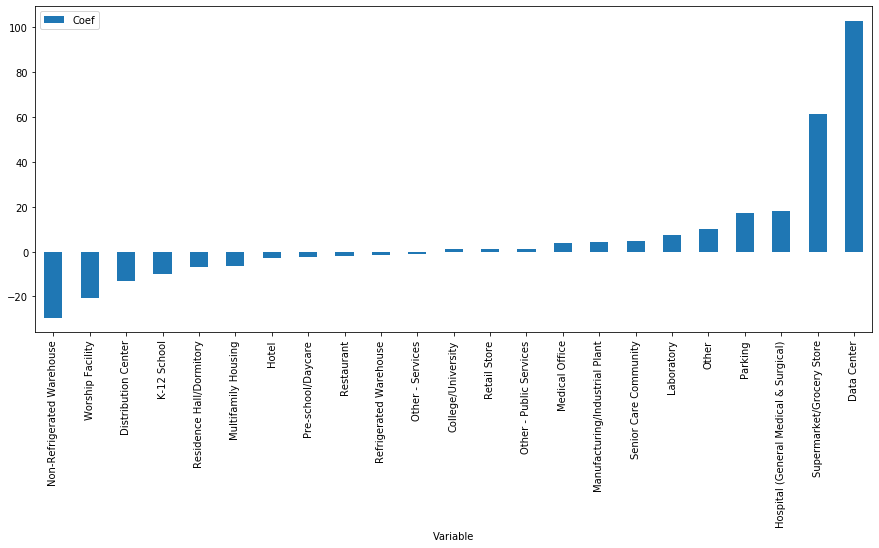

In [102]:
Features_ridge.sort_values(by='Coef', ascending=True, inplace=True)
Features_ridge[(Features_ridge['Variable family'] == 'Property type') & (abs(Features_ridge['Coef']) >= 1)].plot(kind='bar', x='Variable', y='Coef', figsize=(15,6))

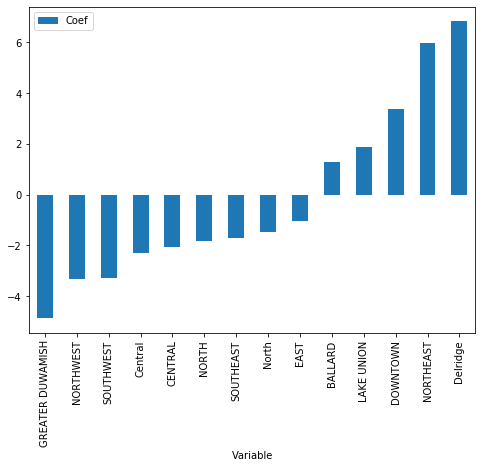

In [103]:
Features_ridge.sort_values(by='Coef', ascending=True, inplace=True)
Features_ridge[(Features_ridge['Variable family'] == 'Neighborhood') & (abs(Features_ridge['Coef']) >= 1)].plot(kind='bar', x='Variable', y='Coef', figsize=(8,6))

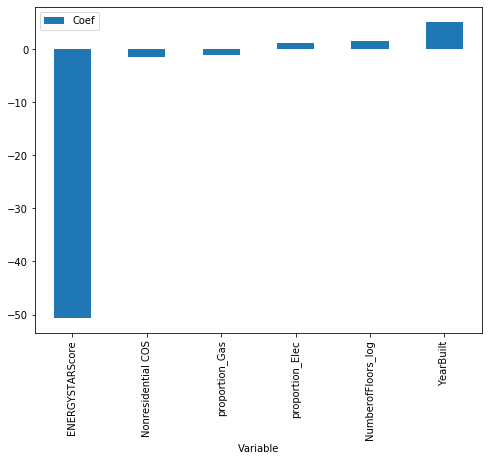

In [104]:
Features_ridge.sort_values(by='Coef', ascending=True, inplace=True)
Features_ridge[(Features_ridge['Variable family'] != 'Property type') & (Features_ridge['Variable family'] != 'Neighborhood') & (abs(Features_ridge['Coef']) >= 1)].plot(kind='bar', x='Variable', y='Coef', figsize=(8,6))

In [105]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(ridge, prefit=True, threshold=0.003)
X_train2 = select.transform(xtrain_scaled)
print('Dimension de l espace de départ: ' + str(xtrain_scaled.shape[1]))
print('Nombre de variables sélectionnées: ' + str(X_train2.shape[1]))

Dimension de l espace de départ: 71
Nombre de variables sélectionnées: 62


In [106]:
Features_ridge[Features_ridge['Variable family'] == 'Nop']

,Variable,Coef,Variable family
5,ENERGYSTARScore,-50.677353,Nop
1,proportion_Steam_log,0.098135,Nop
4,NumberofFloors_log,1.477306,Nop


#### b. Lasso

#### b. i) Lasso: Affinage des paramètres

In [107]:
from sklearn.linear_model import Lasso

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha':np.logspace(-1, 3, num = 100)}

In [108]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_root_mean_squared_error'

# Création du modèle: regression ridge
las = model_selection.GridSearchCV(
    Lasso(max_iter=100000), # algo: regression ridge
    param_grid,     # hyperparamètres à tester
    cv=folds,           # nombre de folds de validation croisée
    scoring=score,  # score à optimiser
)

start = time()

# Optimiser ce classifieur sur le jeu d'entraînement
las.fit(xtrain_scaled, ytrain)

CPtime = ((time() - start))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(las.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        las.cv_results_['mean_test_score'], # score moyen
        las.cv_results_['std_test_score'],  # écart-type du score
        las.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 9.545484566618342}
Résultats de la validation croisée :
neg_root_mean_squared_error = -105.208 (+/-85.027) for {'alpha': 0.1}
neg_root_mean_squared_error = -105.175 (+/-84.999) for {'alpha': 0.10974987654930562}
neg_root_mean_squared_error = -105.139 (+/-84.968) for {'alpha': 0.12045035402587821}
neg_root_mean_squared_error = -105.100 (+/-84.934) for {'alpha': 0.1321941148466029}
neg_root_mean_squared_error = -105.057 (+/-84.896) for {'alpha': 0.14508287784959398}
neg_root_mean_squared_error = -105.010 (+/-84.855) for {'alpha': 0.1592282793341092}
neg_root_mean_squared_error = -104.958 (+/-84.811) for {'alpha': 0.17475284000076838}
neg_root_mean_squared_error = -104.917 (+/-84.755) for {'alpha': 0.19179102616724888}
neg_root_mean_squared_error = -104.875 (+/-84.691) for {'alpha': 0.2104904144512021}
neg_root_mean_squared_error = -104.831 (+/-84.621) for {'alpha': 0.23101297000831597}
neg_root_mean_squared_error = -104.7

In [109]:
ypred = las.predict(xtest_scaled)
print("Meilleur paramètre: alpha = {}".format(las.best_params_['alpha']))
print("Erreur (MAE) sur le jeu de test : {:.3f}".format(metrics.mean_absolute_error(ytest, ypred)))
print("Erreur (MSE) sur le jeu de test : {:.3f}".format(metrics.mean_squared_error(ytest, ypred)))
print("Précision (R2) sur le jeu de test : {:.3f}".format(metrics.r2_score(ytest, ypred)))
print("Computing time: {:.3f} sec.".format(CPtime))

Meilleur paramètre: alpha = 9.545484566618342
Erreur (MAE) sur le jeu de test : 37.773
Erreur (MSE) sur le jeu de test : 2775.364
Précision (R2) sur le jeu de test : 0.917
Computing time: 1.706 sec.


In [110]:
j = np.where(param_grid['alpha'] == las.best_params_['alpha'])
print('Score par pli (neg_root_mean_squared_error), meilleur paramètre:')
print("Score 1er pli:",np.around(las.cv_results_['split0_test_score'][j],2))
print("Score 2e pli:",np.around(las.cv_results_['split1_test_score'][j],2))
print("Score 3e pli:",np.around(las.cv_results_['split2_test_score'][j],2))
print("Score 4e pli:",np.around(las.cv_results_['split3_test_score'][j],2))
print("Score 5e pli:",np.around(las.cv_results_['split4_test_score'][j],2))

Score par pli (neg_root_mean_squared_error), meilleur paramètre:
Score 1er pli: [-126.28]
Score 2e pli: [-57.4]
Score 3e pli: [-100.9]
Score 4e pli: [-69.73]
Score 5e pli: [-136.64]


In [111]:
IX = data2[variables]
IGREC = data2[[target]]
IX_scaled = std_scale.transform(IX)

from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha = 9.545484566618342, max_iter=100000)
bloup = cross_val_score(lasso, IX_scaled, IGREC, cv=5, scoring='r2')

print('cross_val_score: ' + str(bloup))
print('Moyenne: ' + str(bloup.mean()))
print('Ecart-type: '+ str(bloup.std()))

cross_val_score: [0.83421229 0.64936502 0.52652456 0.73734101 0.88487918]
Moyenne: 0.7264644114757054
Ecart-type: 0.12864167692642467


#### b. ii) Lasso: Calcul de l'importance des différents features

In [112]:
a = las.best_params_['alpha']

lasso = Lasso()

lasso.set_params(alpha=a)
lasso.fit(xtrain_scaled, ytrain)
R2_lasso = lasso.score(xtest_scaled, ytest, sample_weight=None)
print('R2: ' + str(R2_lasso))
coefs = lasso.coef_
Features_lasso = pd.DataFrame(np.concatenate((np.array(variables).reshape(len(np.array(variables)),1), coefs.reshape(len(coefs),1)), axis = 1), columns = ['Variable', 'Coef'])

R2: 0.9168595960756618


In [113]:
def variable_family (row):
    y = 'Nop'
    if row['Variable'] == 'YearBuilt':
        y = 'Year'
    if row['Variable'] in ['proportion_Steam', 'proportion_Elec', 'proportion_Gas']:
        y = 'Energy type'
    if row['Variable'] in BuildType_feature_labels:
        y = 'Building type'
    if row['Variable'] in Nbh_feature_labels:
        y = 'Neighborhood'
    if row['Variable'] in Property_types:
        y = 'Property type'
    return y
        
Features_lasso['Variable family'] = Features_lasso.apply(lambda x: variable_family(x), axis = 1)

Features_lasso[['Coef']] = Features_lasso[['Coef']].apply(pd.to_numeric)

In [114]:
Features_lasso

,Variable,Coef,Variable family
0,YearBuilt,0.0,Year
1,proportion_Steam_log,0.0,Nop
2,proportion_Elec,0.0,Energy type
3,proportion_Gas,-0.0,Energy type
4,NumberofFloors_log,0.0,Nop
...,...,...,...
66,Food Service,0.0,Property type
67,"Personal Services (Health/Beauty, Dry Cleaning...",0.0,Property type
68,Pre-school/Daycare,-0.0,Property type
69,Prison/Incarceration,0.0,Property type


In [115]:
Features_lasso[Features_lasso['Coef'] != 0]

,Variable,Coef,Variable family
5,ENERGYSTARScore,-51.582573,Nop
20,GREATER DUWAMISH,-0.581134,Neighborhood
36,Other,2.327624,Property type
37,K-12 School,-3.799249,Property type
42,Non-Refrigerated Warehouse,-25.296885,Property type
47,Hospital (General Medical & Surgical),12.173183,Property type
52,Distribution Center,-5.734399,Property type
53,Parking,17.515936,Property type
55,Worship Facility,-13.994898,Property type
57,Data Center,110.795863,Property type


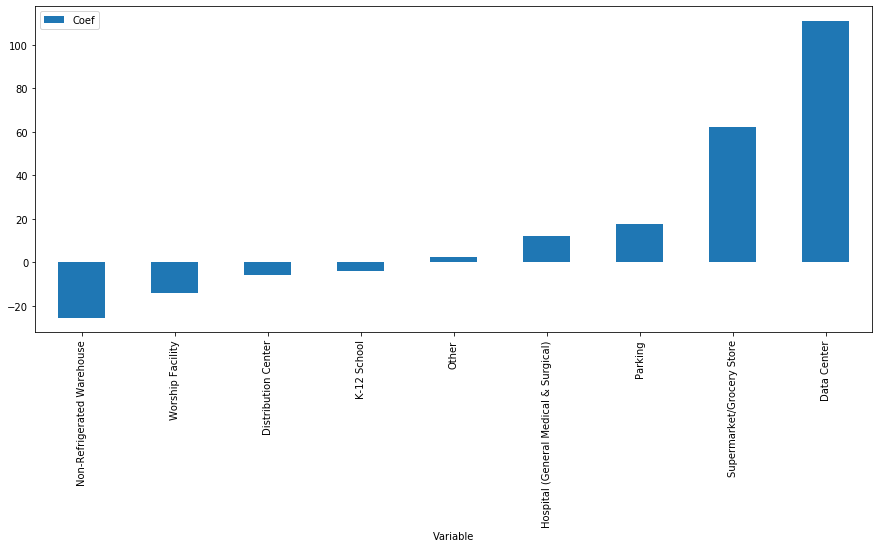

In [116]:
Features_lasso.sort_values(by='Coef', ascending=True, inplace=True)
Features_lasso[(Features_lasso['Variable family'] == 'Property type') & (Features_lasso['Coef'] != 0)].plot(kind='bar', x='Variable', y='Coef', figsize=(15,6))

In [117]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(lasso, prefit=True, threshold=0.003)
X_train2 = select.transform(xtrain_scaled)
print('Dimension de l espace de départ: ' + str(xtrain_scaled.shape[1]))
print('Nombre de variables sélectionnées: ' + str(X_train2.shape[1]))

Dimension de l espace de départ: 71
Nombre de variables sélectionnées: 11


## Annexe: feature importance pour des modèles sans coefficients

Pour apprendre à exploiter les résultats des autres modèles, et par curiosité, j'ai cherché à exploité les données des modèles sans coefficients. Je représente les importances relatives des différentes variables dans chaque modèle.

a. Random Forest Regressor  
b. Gradient Boosting Regressor

In [118]:
import shap

#### a. Random Forest Regressor

In [119]:
rf = RandomForestRegressor(min_samples_split = 5, max_features = "auto", max_depth = 50, min_samples_leaf = 2)
rf.fit(xtrain_scaled,ytrain.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xtrain_scaled)

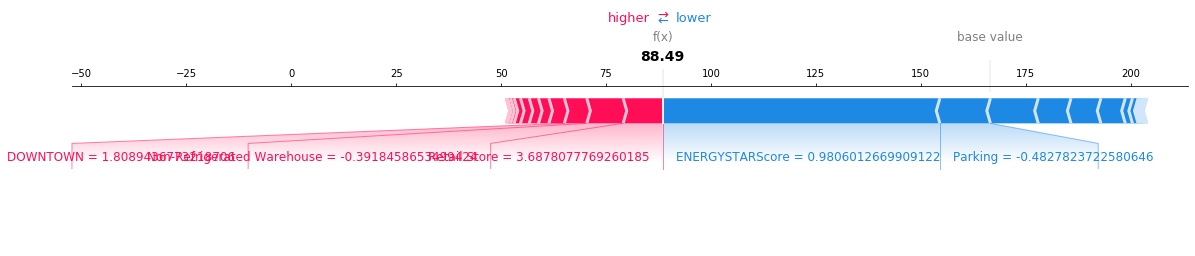

In [121]:
i = 3
shap.force_plot(explainer.expected_value, shap_values[i], features=xtrain_scaled[i], feature_names=xtrain.columns, matplotlib=True)

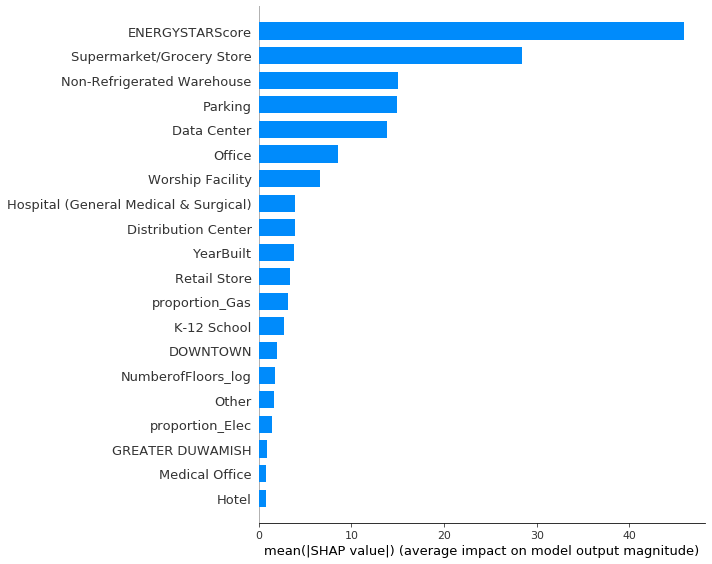

In [122]:
shap.summary_plot(shap_values, features=xtrain, feature_names=xtrain.columns, plot_type='bar')

#### b. Gradient Boosting Regressor

In [123]:
GBR = GradientBoostingRegressor(learning_rate = 0.04, subsample = 0.5, max_depth = 6)
GBR.fit(xtrain_scaled,ytrain.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.04, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
explainer = shap.TreeExplainer(GBR)
shap_values = explainer.shap_values(xtrain_scaled)

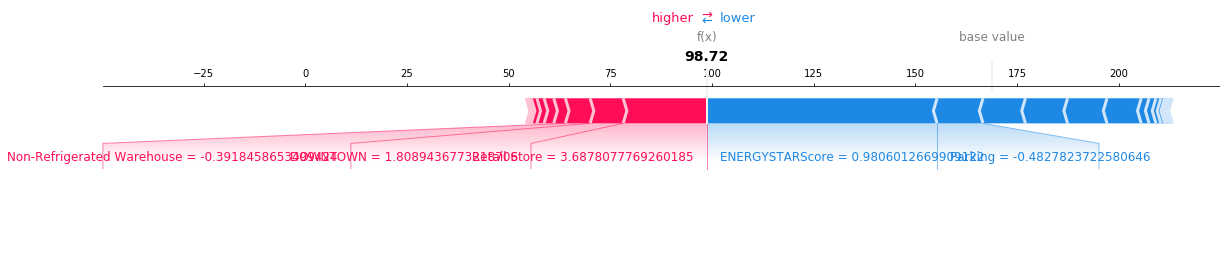

In [125]:
i = 3
shap.force_plot(explainer.expected_value, shap_values[i], features=xtrain_scaled[i], feature_names=xtrain.columns, matplotlib=True)

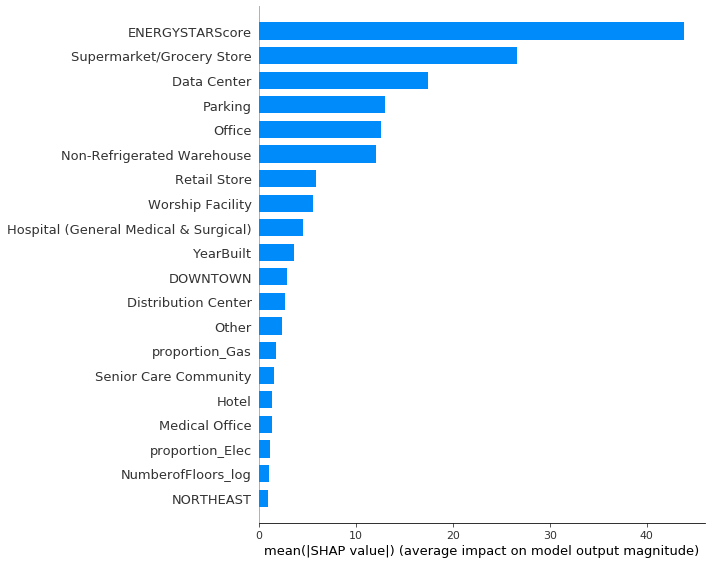

In [126]:
shap.summary_plot(shap_values, features=xtrain, feature_names=xtrain.columns, plot_type='bar')